In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    explained_variance_score,
    max_error
)


In [3]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [4]:
#!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor

In [5]:
print(os.getcwd())

c:\Users\User Laptop\Desktop\Projekt_\projekt_dental\notebooks


In [6]:
df = pd.read_excel("../data/processed_data/merged_df_25.08last.xlsx")

In [7]:
df.head(5)

Location  Period TotalExpenditure  PerCapitaExpenditure  \
0        Angola    2019             70.2                   2.3   
1       Burundi    2019              1.3                   0.1   
2         Benin    2019              3.3                   0.3   
3  Burkina Faso    2019              4.6                   0.2   
4      Botswana    2019             57.4                  24.1   

   EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
0             4.0             23.9                 27.2   
1             2.0             19.2                 31.7   
2             2.9             27.1                 29.5   
3             1.9             27.4                 27.5   
4             7.5             26.3                 32.7   

   UntreatedDeciduousCaries11_9Rate ProductivityLossRate both_cancer  \
0                              37.8                195.8         482   
1                              41.6                  5.3          92   
2                              39.6                 30.0          74   
3                              40.3                 30.8         179   
4                              37.6                 59.2          60   

  female_cancer male_cancer  
0           166         316  
1            30          62  
2            42          32  
3            55         124  
4             8          52

| S√ºtun Adƒ±                      | A√ßƒ±klama                                                                   |
|--------------------------------|----------------------------------------------------------------------------|
| Location                       | √úlke adƒ± (√∂rneƒüin: Angola)                                                 |
| Period                         | Veri yƒ±lƒ± (√∂rneƒüin: 2019)                                                  |
| TotalExpenditure               | Di≈ü Saƒülƒ±ƒüƒ± Hizmetleri ‚Äì Toplam Harcama (US$)                              |
| PerCapitaExpenditure           | Ki≈üi Ba≈üƒ±na Di≈ü Saƒülƒ±ƒüƒ± Harcamasƒ± (US$)                                    |
| EdentulismRate                 | 20 Ya≈ü √úst√º Bireylerde Di≈üsizlik Yaygƒ±nlƒ±ƒüƒ± (%)                            |
| PeriodontalRate                | 15 Ya≈ü √úst√º Bireylerde ≈ûiddetli Periodontal Hastalƒ±k Yaygƒ±nlƒ±ƒüƒ± (%)        |
| UntreatedCariesRate            | 5 Ya≈ü √úst√º Bireylerde Kalƒ±cƒ± Di≈ülerde Tedavi Edilmemi≈ü √á√ºr√ºk Yaygƒ±nlƒ±ƒüƒ± (%)|
| UntreatedDeciduousCaries1_9Rate| 1‚Äì9 Ya≈ü Arasƒ± √áocuklarda S√ºt Di≈üi √á√ºr√ºƒü√º (Tedavi Edilmemi≈ü) Yaygƒ±nlƒ±ƒüƒ±     |
| ProductivityLossRate           | 5 Aƒüƒ±z Hastalƒ±ƒüƒ± Nedeniyle Toplam √úretkenlik Kaybƒ± (US$)                   |
| both_cancer                    | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Toplam n√ºfus icin yeni vaka sayisi          |
| female_cancer                  | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Kadinlar icin yeni vaka sayisi              |
| male_cancer                    | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Erkekler icin yeni vaka sayisi              |


In [8]:
# T√ºm string s√ºtunlarda bo≈üluklarƒ± kaldƒ±r
df = df.apply(lambda col: col.str.replace(" ", "", regex=False) if col.dtype == "object" else col)

In [9]:
#Tekrarlayan satirimiz var mi
df.duplicated().any()


False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Location                          192 non-null    object 
 1   Period                            192 non-null    int64  
 2   TotalExpenditure                  192 non-null    object 
 3   PerCapitaExpenditure              192 non-null    float64
 4   EdentulismRate                    192 non-null    float64
 5   PeriodontalRate                   192 non-null    float64
 6   UntreatedCariesRate               192 non-null    float64
 7   UntreatedDeciduousCaries11_9Rate  192 non-null    float64
 8   ProductivityLossRate              192 non-null    object 
 9   both_cancer                       174 non-null    object 
 10  female_cancer                     171 non-null    object 
 11  male_cancer                       174 non-null    object 
dtypes: float

##### Sadece sayisal olmasi gereken s√ºtunlari sayisal ver tipine g√∂n√ºst√ºrme

In [11]:
# 'period' ve 'location' dƒ±≈üƒ±ndaki s√ºtunlarƒ± se√ß
cols_to_convert = [col for col in df.columns if col not in ['Period', 'Location']]

# Sadece bu s√ºtunlarƒ± numeric'e √ßevir
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [12]:
df.dtypes

Location                             object
Period                                int64
TotalExpenditure                    float64
PerCapitaExpenditure                float64
EdentulismRate                      float64
PeriodontalRate                     float64
UntreatedCariesRate                 float64
UntreatedDeciduousCaries11_9Rate    float64
ProductivityLossRate                float64
both_cancer                         float64
female_cancer                       float64
male_cancer                         float64
dtype: object

In [13]:
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Location  Period  TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
10    Comoros    2019               0.3                   0.3             2.9   
49    Bahamas    2019              32.9                 514.9             6.4   
161  Maldives    2019               0.6                   1.7             3.2   

     PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
10              22.8                 32.3                              40.3   
49              25.9                 28.7                              43.9   
161              8.1                 28.0                              44.0   

     ProductivityLossRate  both_cancer  female_cancer  male_cancer  
10                    2.7          5.0            NaN          5.0  
49                   47.8          5.0            NaN          5.0  
161                  15.5          5.0            NaN          5.0

In [14]:
# Ko≈üullu olarak NaN ‚Üí 0
df.loc[df["female_cancer"].isna() & df["both_cancer"].notna(), "female_cancer"] = 0


In [15]:
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Empty DataFrame
Columns: [Location, Period, TotalExpenditure, PerCapitaExpenditure, EdentulismRate, PeriodontalRate, UntreatedCariesRate, UntreatedDeciduousCaries11_9Rate, ProductivityLossRate, both_cancer, female_cancer, male_cancer]
Index: []

In [16]:
df.describe().T

count         mean           std     min  \
Period                            192.0  2019.000000      0.000000  2019.0   
TotalExpenditure                  192.0  2016.106771  11135.195720     0.0   
PerCapitaExpenditure              192.0    54.919271    115.728152     0.0   
EdentulismRate                    192.0     7.644792      3.965027     1.2   
PeriodontalRate                   192.0    18.439583      6.910702     2.3   
UntreatedCariesRate               192.0    32.256250      4.520687    21.9   
UntreatedDeciduousCaries11_9Rate  192.0    41.733854      6.347399    18.7   
ProductivityLossRate              192.0  1680.660417   7038.217347     0.1   
both_cancer                       174.0  2124.356322  10860.615852     2.0   
female_cancer                     174.0   646.954023   2673.235330     0.0   
male_cancer                       174.0  1477.402299   8238.145004     1.0   

                                       25%      50%       75%       max  
Period                            2019.000  2019.00  2019.000    2019.0  
TotalExpenditure                     3.500    45.60   227.275  133505.8  
PerCapitaExpenditure                 0.675     9.20    39.525     867.2  
EdentulismRate                       4.300     7.50    10.625      16.8  
PeriodontalRate                     15.175    19.20    23.725      33.5  
UntreatedCariesRate                 29.200    31.85    35.500      49.5  
UntreatedDeciduousCaries11_9Rate    39.075    43.60    46.500      53.2  
ProductivityLossRate                21.950   103.65   744.250   78468.5  
both_cancer                         60.250   203.00   858.250  135929.0  
female_cancer                       23.250    89.50   302.000   31268.0  
male_cancer                         38.250   122.50   565.250  104661.0

In [17]:
# Eksik deƒüerleri kontrol et
print(df.isna().sum())

Location                             0
Period                               0
TotalExpenditure                     0
PerCapitaExpenditure                 0
EdentulismRate                       0
PeriodontalRate                      0
UntreatedCariesRate                  0
UntreatedDeciduousCaries11_9Rate     0
ProductivityLossRate                 0
both_cancer                         18
female_cancer                       18
male_cancer                         18
dtype: int64


In [18]:
# 
# Kanser s√ºtunlarƒ± (both/female/male) -> NaN bƒ±rak
# Eksik deƒüerleri 0 ile doldurmuyoruz, b√∂ylece analizde hatalƒ± yorum olmaz


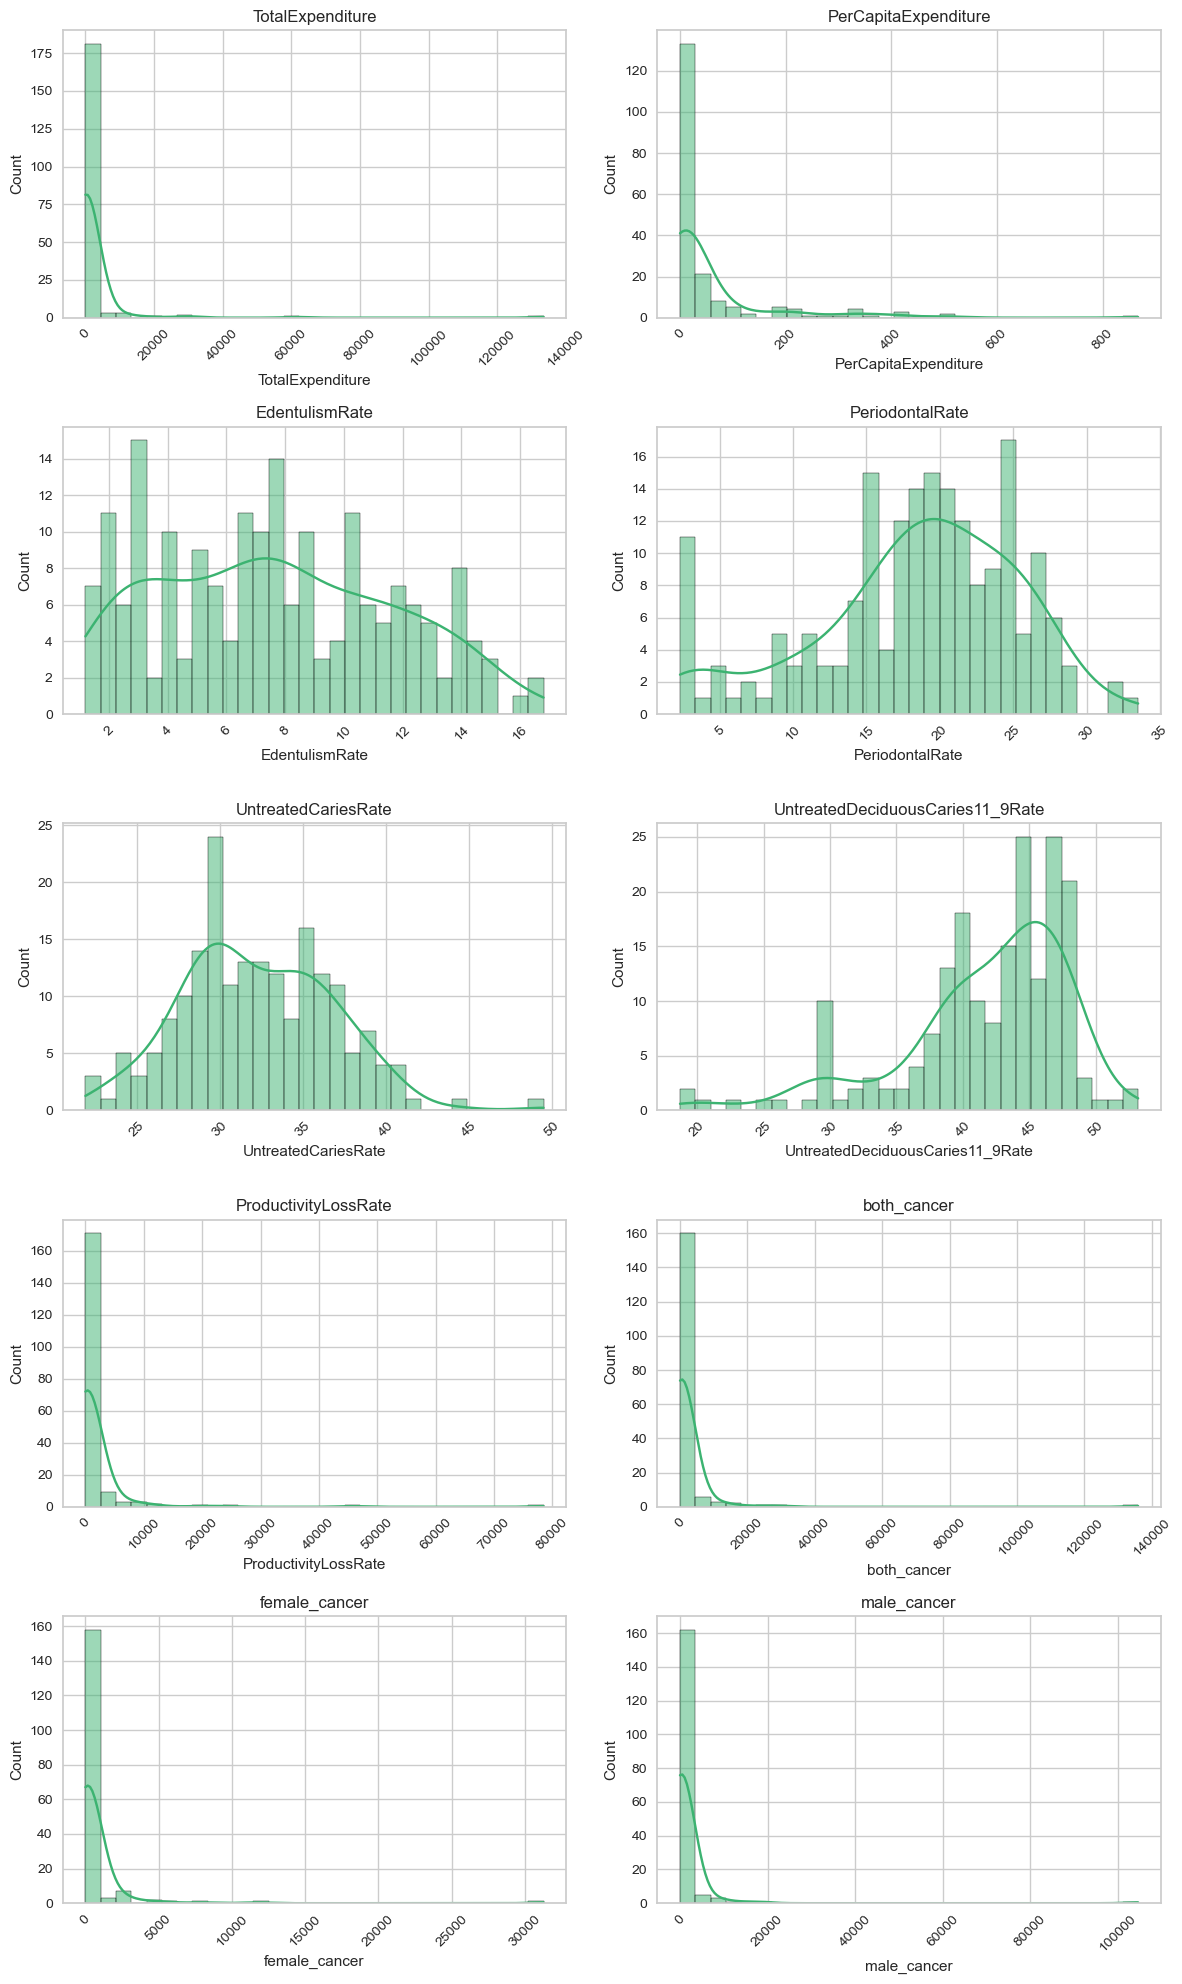

In [19]:
numeric_cols = [col for col in df.columns if col not in ['Period', 'Location']]
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    
    # Histogram + KDE (trendline)
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='mediumseagreen', edgecolor='black')
    
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# Fazla bo≈ü subplotlarƒ± kaldƒ±r
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows*n_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [20]:
#En √ßok harcama yapan 10 √ºlke
top_total_expenditure = df.sort_values("TotalExpenditure", ascending=False).head(10)

print("En √ßok harcama yapan 10 √ºlke:")
print(top_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]].to_string(index=False))


En √ßok harcama yapan 10 √ºlke:
                                     Location  TotalExpenditure  PerCapitaExpenditure
                        UnitedStatesofAmerica          133505.8                 405.5
                                        China           61548.6                  44.0
                                      Germany           30877.3                 372.2
                                        Japan           28733.6                 227.7
                                        Italy           19123.0                 316.8
                                       Canada           12829.1                 342.5
                                       France           12666.0                 195.4
UnitedKingdomofGreatBritainandNorthernIreland            9576.9                 143.2
                                        Spain            8306.3                 178.0
                                    Australia            7370.3                 288.3


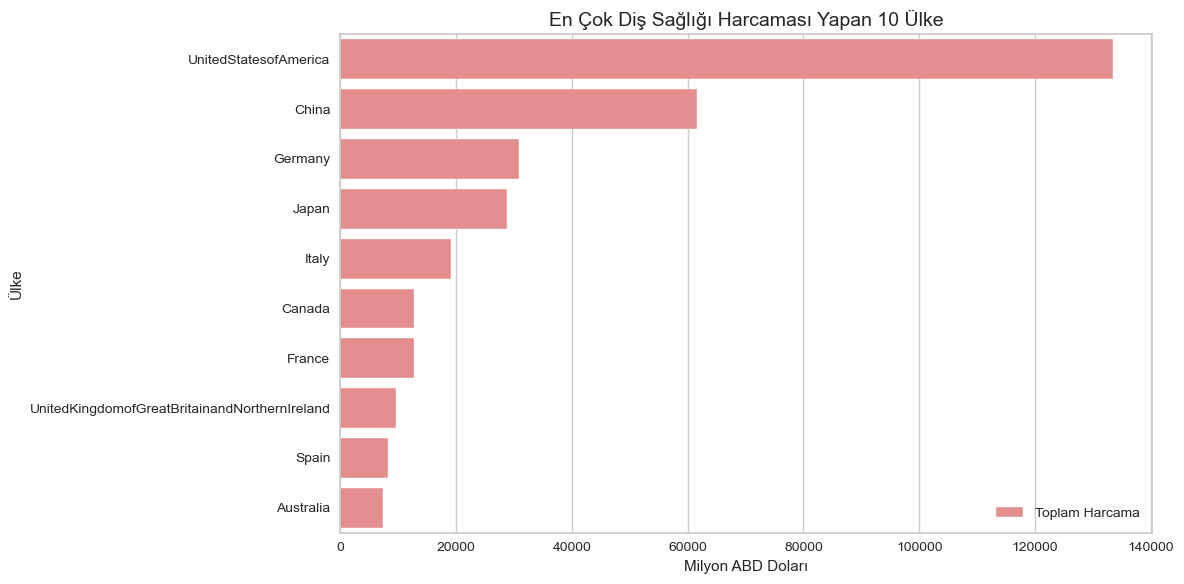

In [21]:
# En √ßok harcama yapan 10 √ºlkeyi se√ß
top_total_expenditure = df.sort_values("TotalExpenditure", ascending=False).head(10)

# Grafik boyutu ve stil
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Toplam harcama √ßubuƒüu
sns.barplot(
    x="TotalExpenditure",
    y="Location",
    data=top_total_expenditure,
    color="lightcoral",
    label="Toplam Harcama"
)


# Ba≈ülƒ±k ve a√ßƒ±klamalar
plt.title("En √áok Di≈ü Saƒülƒ±ƒüƒ± Harcamasƒ± Yapan 10 √úlke", fontsize=14)
plt.xlabel("Milyon ABD Dolarƒ±")
plt.ylabel("√úlke")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [22]:
# En d√º≈ü√ºk harcama yapan 10 √ºlke
low_total_expenditure = df.sort_values("TotalExpenditure", ascending=True).head(10)
print("\nEn d√º≈ü√ºk harcama yapan 10 √ºlke:")
print(low_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]])


En d√º≈ü√ºk harcama yapan 10 √ºlke:
                     Location  TotalExpenditure  PerCapitaExpenditure
21                      Kenya               0.0                   0.0
173                  Cambodia               0.0                   0.0
18                     Gambia               0.0                   0.0
88                       Iraq               0.0                   0.0
31                      Niger               0.0                   0.0
157                    Bhutan               0.0                   0.1
42   UnitedRepublicofTanzania               0.1                   0.0
188                    Tuvalu               0.1                   6.8
190                   Vanuatu               0.1                   0.5
14                   Ethiopia               0.1                   0.0


In [23]:
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate","ProductivityLossRate"]

# √úlkeleri toplam harcama sƒ±rasƒ±na g√∂re g√∂ster
df_top_spenders_health = top_total_expenditure[["Location"] + health_cols]
print("\nEn √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:")

# Tek satƒ±rda g√∂stermek i√ßin
print(df_top_spenders_health.to_string(index=False))



En √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:
                                     Location  EdentulismRate  PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  ProductivityLossRate
                        UnitedStatesofAmerica            10.2             15.7                 24.3                              42.6               78468.5
                                        China             5.7             17.5                 24.6                              47.2               45713.1
                                      Germany            11.7             27.4                 31.7                              29.1               19395.9
                                        Japan            11.7             20.6                 25.8                              39.5               23663.0
                                        Italy            12.9             18.2                 29.6                              36.1                9541.6
     

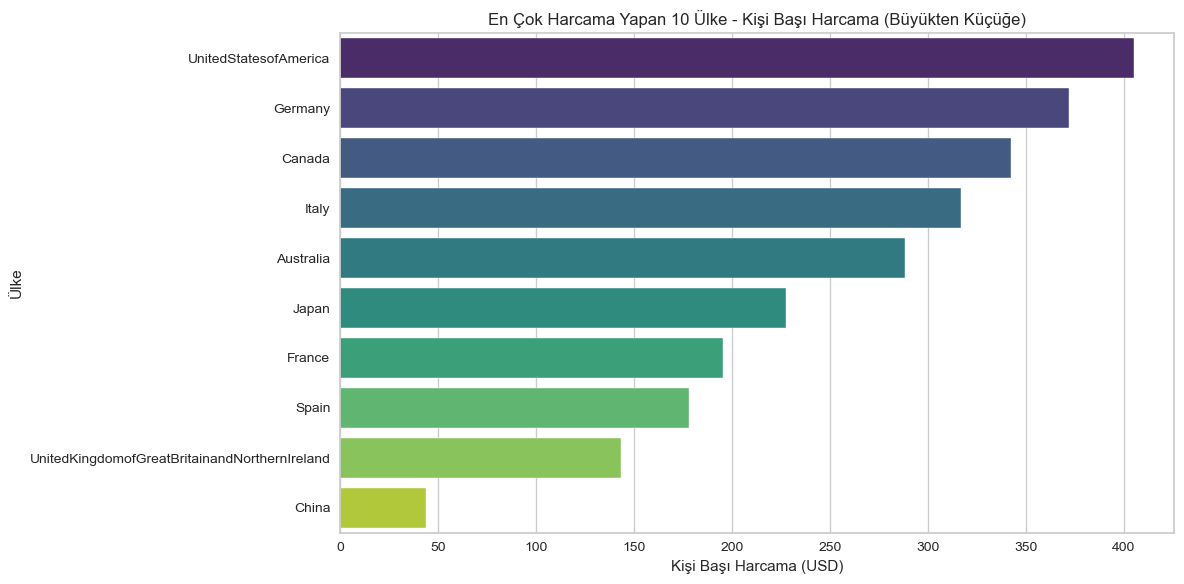

In [24]:
# Ki≈üi ba≈üƒ± harcamaya g√∂re b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralama
sorted_df = top_total_expenditure.sort_values("PerCapitaExpenditure", ascending=False)

# Grafik
plt.figure(figsize=(12, 6))
sns.barplot(
    x="PerCapitaExpenditure",
    y="Location",
    data=sorted_df,
    palette="viridis"
)

plt.title("En √áok Harcama Yapan 10 √úlke - Ki≈üi Ba≈üƒ± Harcama (B√ºy√ºkten K√º√ß√ºƒüe)")
plt.xlabel("Ki≈üi Ba≈üƒ± Harcama (USD)")
plt.ylabel("√úlke")
plt.tight_layout()
plt.show()


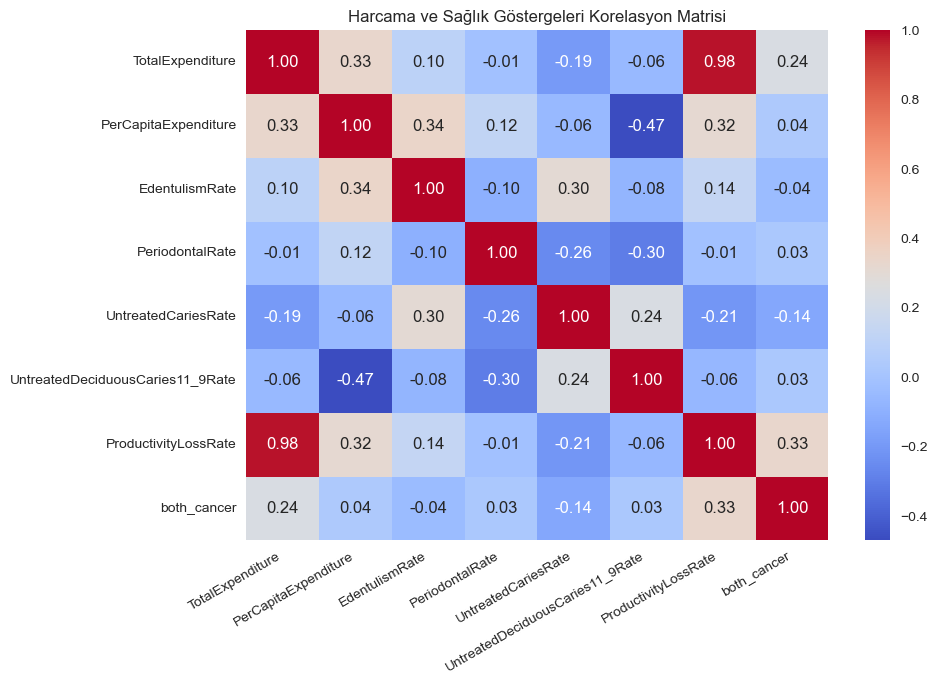

In [25]:
# Sayƒ±sal s√ºtunlarƒ± se√ß
numeric_for_corr = [col for col in df.columns if col not in ['Period', 'Location','female_cancer', 'male_cancer']]

# Korelasyon matrisi
corr = df[numeric_for_corr].corr()

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 7))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

# X ekseni etiketlerini 45 derece d√∂nd√ºr
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.title("Harcama ve Saƒülƒ±k G√∂stergeleri Korelasyon Matrisi")
plt.tight_layout()
plt.show()


In [26]:
# TotalExpenditure'e g√∂re 3 gruba ayƒ±r (Low, Medium, High)
df["ExpenditureGroup"] = pd.qcut(df["TotalExpenditure"], 3, labels=["Low", "Medium", "High"])

# Gruplara g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate"]

grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()
print("Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±:")
print(grouped_health)

Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±:
                  EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
ExpenditureGroup                                                         
Low                     4.493750        18.701563            31.628125   
Medium                  8.445312        17.728125            32.607813   
High                    9.995313        18.889063            32.532812   

                  UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  
ExpenditureGroup                                                          
Low                                      42.221875             37.326563  
Medium                                   43.009375            273.854688  
High                                     39.970312           4730.800000  


In [27]:
# Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±
grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()

# Daha okunaklƒ± ve g√∂rsel olarak zengin tablo
styled_table = grouped_health.style\
    .format("{:.4f}")\
    .background_gradient(cmap="YlGnBu")\
    .set_caption("Harcama Gruplarƒ±na G√∂re Saƒülƒ±k G√∂stergeleri Ortalamalarƒ±")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'), ('font-size', '14px'), ('font-weight', 'bold')]
    }])

styled_table

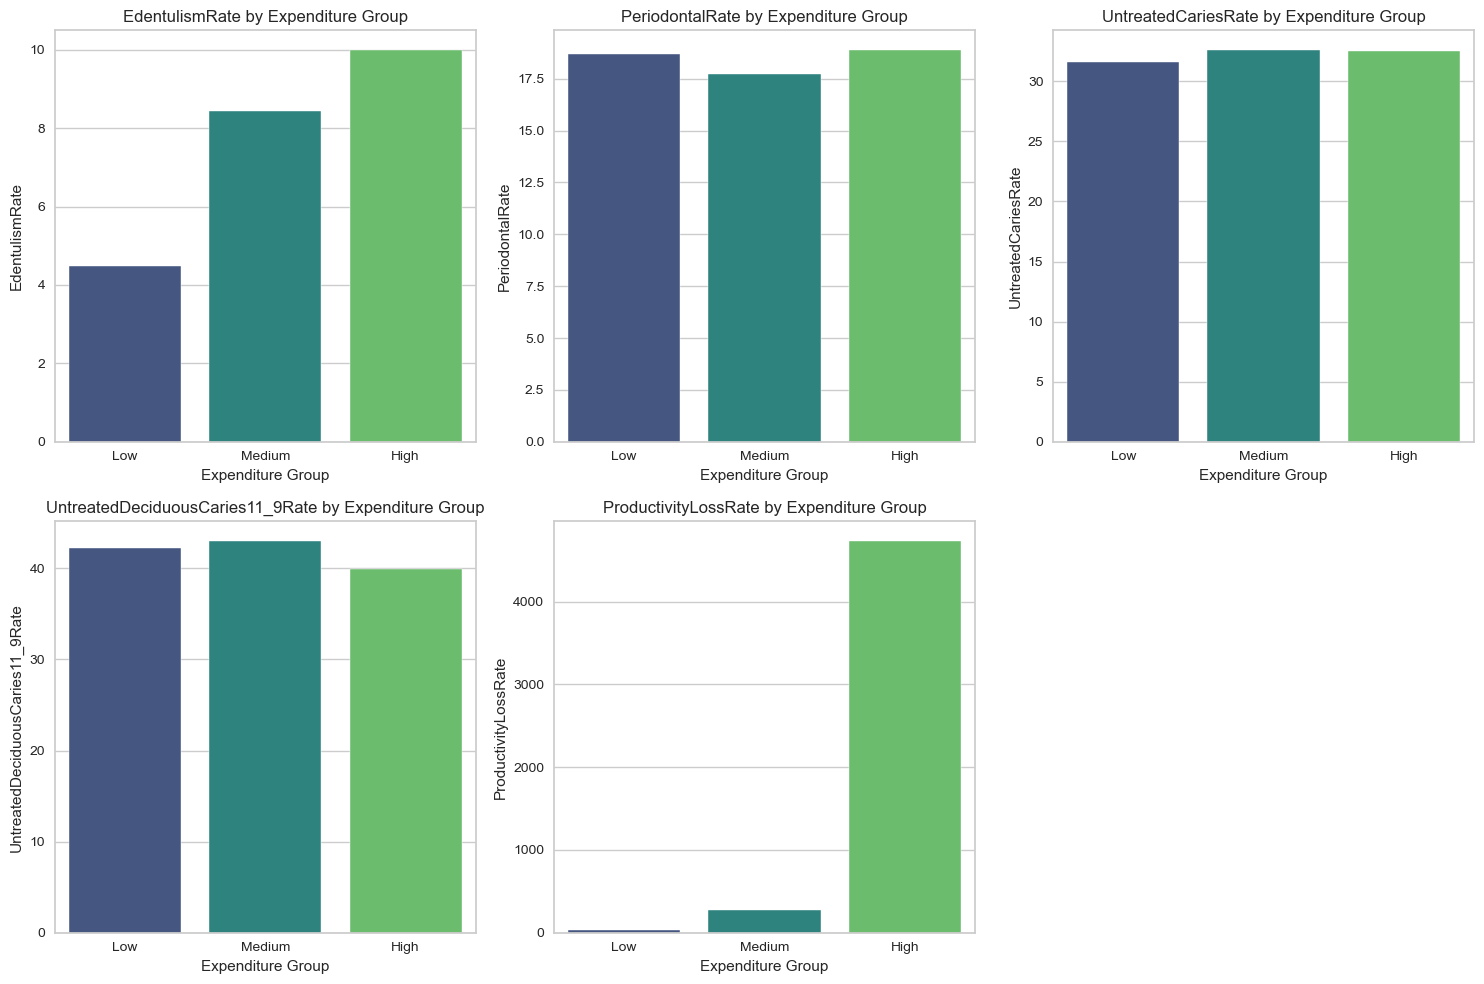

In [28]:
# Ayar: ka√ß s√ºtun olsun
n_cols = 3
n_rows = (len(health_cols) + n_cols - 1) // n_cols  # Satƒ±r sayƒ±sƒ±nƒ± otomatik ayarla

# Grafik alanƒ±
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# axes'i her durumda d√ºzle≈ütir (tek subplot olsa bile listeye √ßevir)
if isinstance(axes, plt.Axes):
    axes = [axes]
else:
    axes = axes.flatten()

# Her g√∂sterge i√ßin bar plot
for i, col in enumerate(health_cols):
    sns.barplot(
        x=grouped_health.index,
        y=grouped_health[col],
        palette="viridis",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Expenditure Group")
    axes[i].set_xlabel("Expenditure Group")
    axes[i].set_ylabel(col)

# Fazla bo≈ü eksenleri kaldƒ±r (varsa)
for j in range(len(health_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


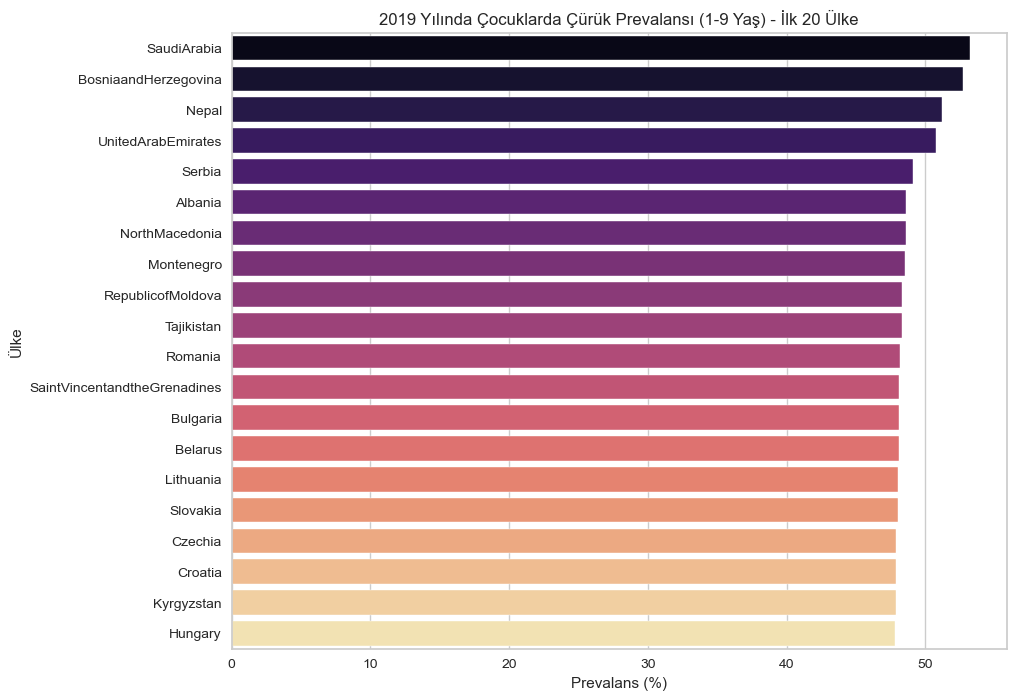

In [29]:
#2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke
# En y√ºksek 20 √ºlkeyi se√ß
top20_caries = df.nlargest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=top20_caries, palette="magma")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


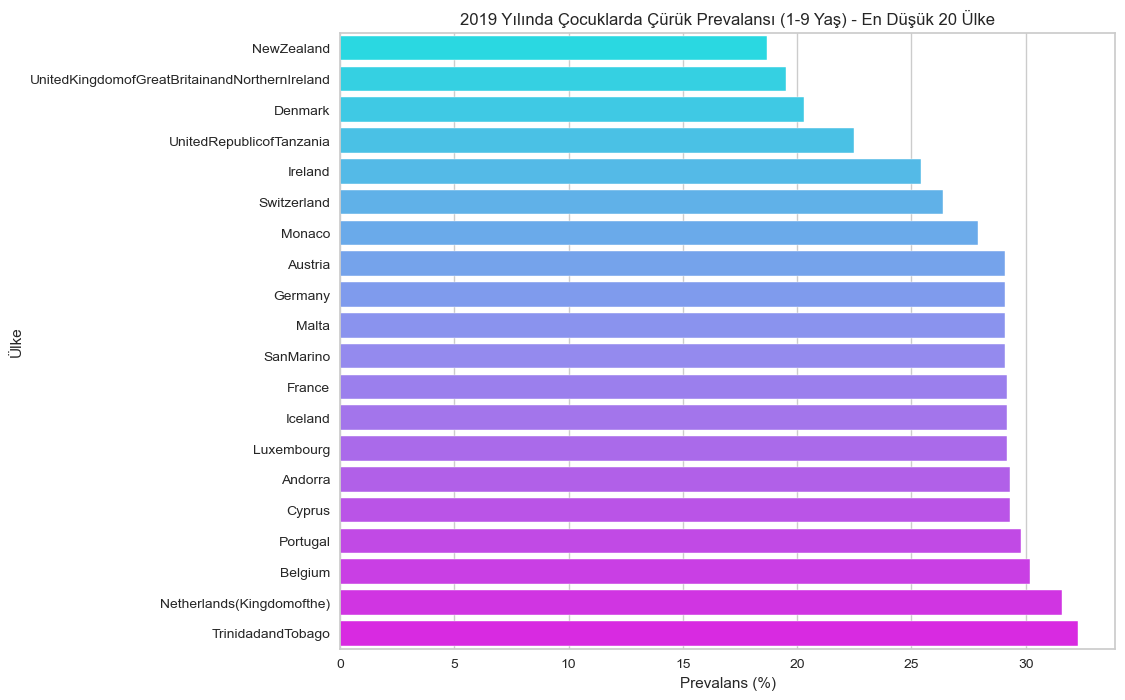

In [30]:
# En d√º≈ü√ºk 20 √ºlkeyi se√ß
bottom20_caries = df.nsmallest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=bottom20_caries, palette="cool")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - En D√º≈ü√ºk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


In [31]:
countries = ["Germany", "T√ºrkiye"]
df_countries = df[df["Location"].isin(countries)]

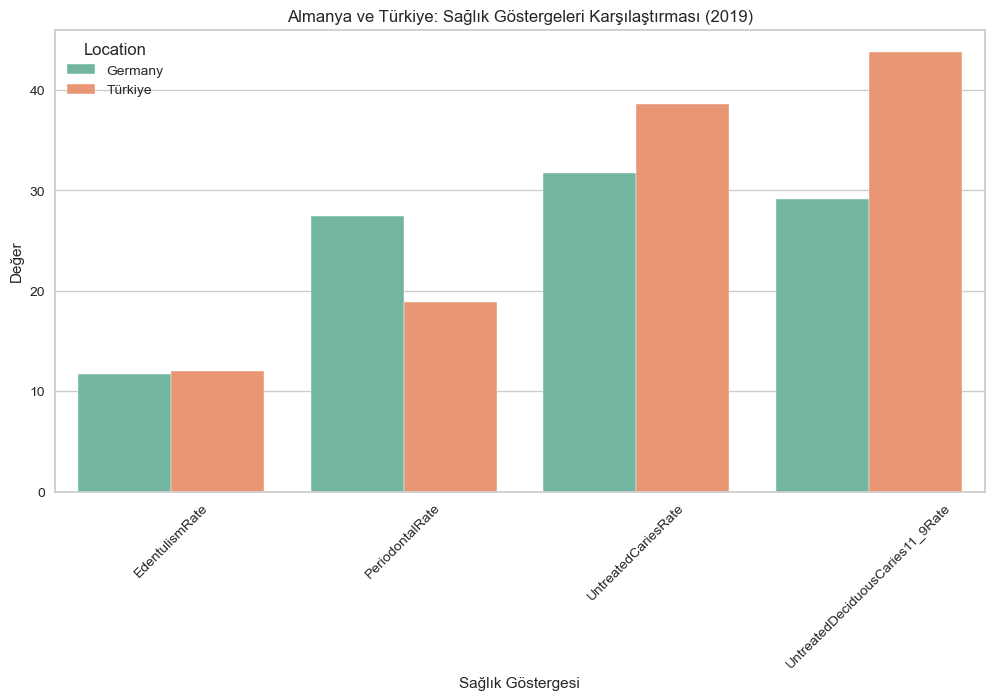

In [32]:
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate"]

plt.figure(figsize=(12,6))
df_melted = df_countries.melt(id_vars=["Location"], value_vars=health_cols,
                              var_name="HealthIndicator", value_name="Value")

sns.barplot(x="HealthIndicator", y="Value", hue="Location", data=df_melted, palette="Set2")
plt.title("Almanya ve T√ºrkiye: Saƒülƒ±k G√∂stergeleri Kar≈üƒ±la≈ütƒ±rmasƒ± (2019)")
plt.xlabel("Saƒülƒ±k G√∂stergesi")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.show()


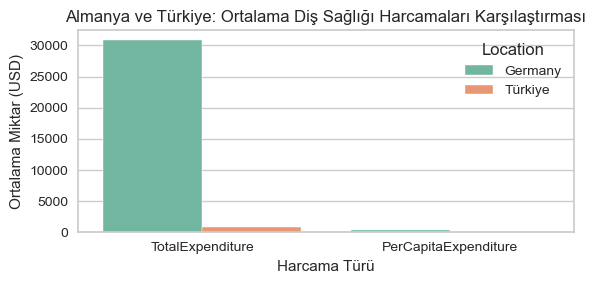

In [33]:
# Kar≈üƒ±la≈ütƒ±rƒ±lacak deƒüi≈ükenler
expenditure_cols = ["TotalExpenditure", "PerCapitaExpenditure"]

# Almanya ve T√ºrkiye i√ßin ortalama deƒüerleri hesapla
df_avg = df_countries.groupby("Location")[expenditure_cols].mean().reset_index()

# Veriyi uzun formata √ßevir
df_avg_melted = df_avg.melt(id_vars="Location", value_vars=expenditure_cols,
                            var_name="ExpenditureType", value_name="AverageValue")

# Grafik
plt.figure(figsize=(6, 3))
sns.barplot(x="ExpenditureType", y="AverageValue", hue="Location", data=df_avg_melted, palette="Set2")

plt.title("Almanya ve T√ºrkiye: Ortalama Di≈ü Saƒülƒ±ƒüƒ± Harcamalarƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±")
plt.xlabel("Harcama T√ºr√º")
plt.ylabel("Ortalama Miktar (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



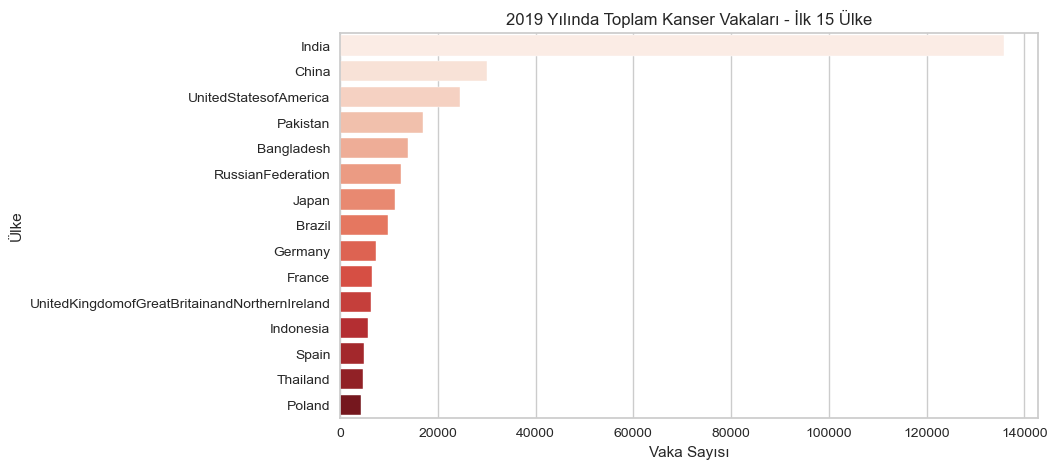

In [34]:
# Toplam kanser vaka sayƒ±sƒ±na g√∂re ilk 15 √ºlke
top15_cancer = df.nlargest(15, "both_cancer")

plt.figure(figsize=(9,5))
sns.barplot(x="both_cancer", y="Location", data=top15_cancer, palette="Reds")
plt.title("2019 Yƒ±lƒ±nda Toplam Kanser Vakalarƒ± - ƒ∞lk 15 √úlke")
plt.xlabel("Vaka Sayƒ±sƒ±")
plt.ylabel("√úlke")
plt.show()


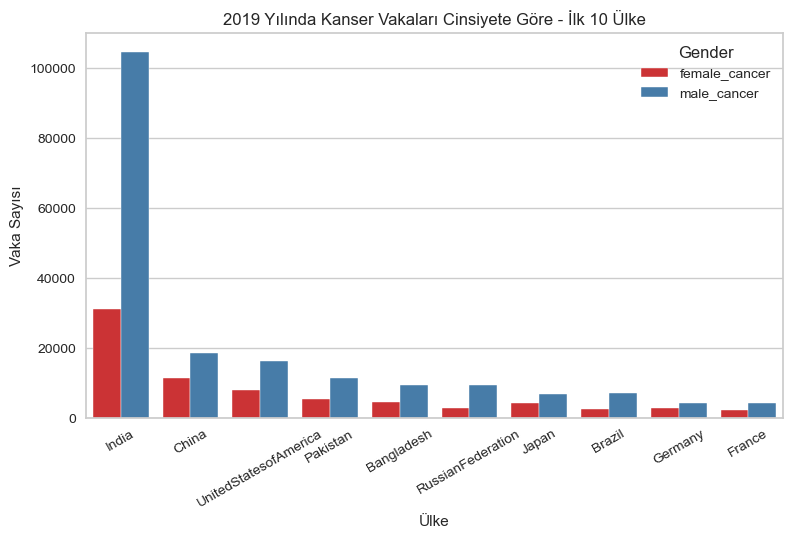

In [35]:
# Sadece ilk 10 √ºlke ile √∂rnek
top10_cancer = df.nlargest(10, "both_cancer")
cancer_cols = ["female_cancer", "male_cancer"]

df_melted = top10_cancer.melt(id_vars=["Location"], value_vars=cancer_cols,
                               var_name="Gender", value_name="Cases")

plt.figure(figsize=(9,5))
sns.barplot(x="Location", y="Cases", hue="Gender", data=df_melted, palette="Set1")
plt.title("2019 Yƒ±lƒ±nda Kanser Vakalarƒ± Cinsiyete G√∂re - ƒ∞lk 10 √úlke")
plt.xlabel("√úlke")
plt.ylabel("Vaka Sayƒ±sƒ±")
plt.xticks(rotation=30)
plt.show()


In [36]:
#Maschine Learning √ñnerileri

#1Ô∏è‚É£ Regresyon Modelleri

#Ama√ß: S√ºrekli deƒüerleri tahmin etmek.

#Hedef deƒüi≈üken (target):

#ProductivityLossRate ‚Üí aƒüƒ±z saƒülƒ±ƒüƒ± ile √ºretkenlik kaybƒ± arasƒ±ndaki ili≈ükiyi tahmin et

#UntreatedDeciduousCaries11_9Rate ‚Üí √ßocuklarda √ß√ºr√ºk prevalansƒ±nƒ± tahmin et

#√ñzellikler (features):

#TotalExpenditure, PerCapitaExpenditure

#EdentulismRate, PeriodontalRate, UntreatedCariesRate

#both_cancer, female_cancer, male_cancer

#Kullanƒ±labilecek modeller: Linear Regression, Random Forest, XGBoost

#2Ô∏è‚É£ Sƒ±nƒ±flandƒ±rma (Classification)

#Ama√ß: √úlkeleri gruplara ayƒ±rmak.

#Hedef deƒüi≈üken:

#Harcama seviyesine g√∂re gruplama ‚Üí Low / Medium / High

#√á√ºr√ºk prevalansƒ±na g√∂re sƒ±nƒ±flandƒ±rma ‚Üí D√º≈ü√ºk / Orta / Y√ºksek

#√ñzellikler: Diƒüer saƒülƒ±k g√∂stergeleri, kanser vakalarƒ±, ki≈üi ba≈üƒ± harcama vb.

#Kullanƒ±labilecek modeller: Logistic Regression, Random Forest, XGBoost, SVM

#3Ô∏è‚É£ K√ºmeleme (Clustering)

#Ama√ß: Benzer √ºlkeleri otomatik gruplama.

#√ñzellikler: T√ºm sayƒ±sal g√∂stergeler (TotalExpenditure, PerCapitaExpenditure, saƒülƒ±k g√∂stergeleri, kanser vakalarƒ± vb.)

#Kullanƒ±lacak y√∂ntemler:

#K-Means ‚Üí √ºlkeleri sayƒ±sal √∂zelliklerine g√∂re k gruba ayƒ±rƒ±r

#Hierarchical Clustering ‚Üí hiyerar≈üik benzerlik analizi

#G√∂rselle≈ütirme: PCA ile 2D projeksiyon, renkler = k√ºmeler

#4Ô∏è‚É£ Feature Importance Analizi

#Hangi deƒüi≈ükenler √ßocuklarda √ß√ºr√ºk, ProductivityLossRate veya kanser vakalarƒ±nƒ± en √ßok etkiliyor?

#Random Forest veya XGBoost kullanarak feature importance √ßƒ±karabiliriz.

#5Ô∏è‚É£ √ñrnek Pipeline

#Veriyi temizle ‚Üí eksik deƒüerleri doldur, aykƒ±rƒ± deƒüerleri cap‚Äôle

#Sayƒ±sal s√ºtunlarƒ± normalize / standardize et

#Hedef deƒüi≈ükeni se√ß ve features ile ayƒ±r

#Train-test split yap (√∂rn. 80-20)

#Model se√ß ve eƒüit

#Model performansƒ±nƒ± deƒüerlendir: RMSE, MAE (regresyon) veya Accuracy, F1-score (sƒ±nƒ±flandƒ±rma)

#üí° √ñzetle:

#Regresyon ‚Üí √ºretkenlik kaybƒ± veya √ß√ºr√ºk oranƒ± tahmini

#Sƒ±nƒ±flandƒ±rma ‚Üí √ºlkeleri saƒülƒ±k veya harcama kategorilerine ayƒ±rma

#K√ºmeleme ‚Üí benzer √ºlkeleri segmentleme

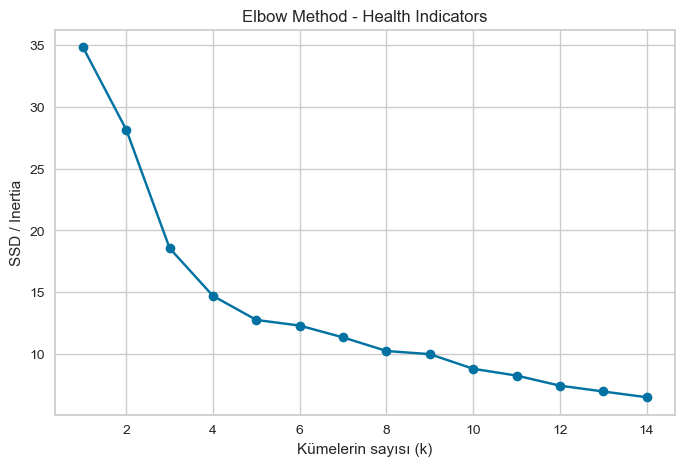

In [37]:
#Aƒüƒ±z Saƒülƒ±ƒüƒ± K√ºme Profilleri (K-means)

health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate"]

# √ñl√ßekleme
scaler = MinMaxScaler()
X_health_scaled = scaler.fit_transform(df[health_cols])

# Elbow Method i√ßin SSD hesaplama
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_health_scaled)   # Fit et
    ssd.append(kmeans.inertia_)   # SSD'yi ekle

# G√∂rselle≈ütirme
plt.figure(figsize=(8,5))
plt.plot(K, ssd, 'bo-')
plt.xlabel('K√ºmelerin sayƒ±sƒ± (k)')
plt.ylabel('SSD / Inertia')
plt.title('Elbow Method - Health Indicators')
plt.show()

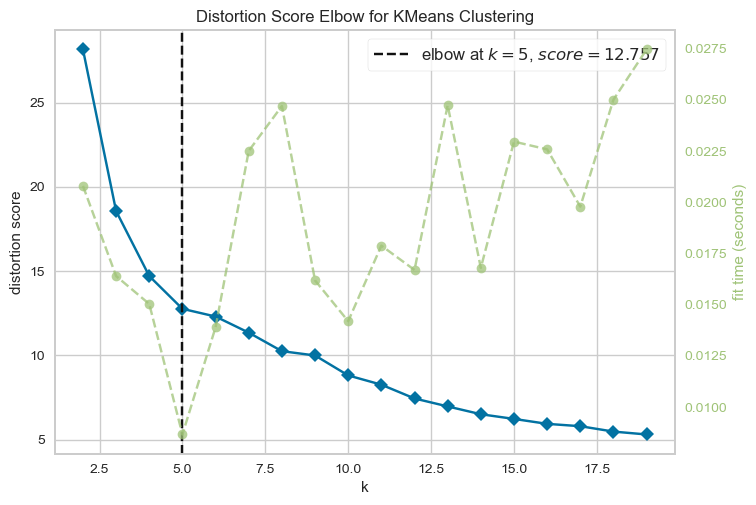

Optimal k√ºme sayƒ±sƒ±: 5


In [38]:
# √ñl√ßekleme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[health_cols])

# KMeans modeli
kmeans = KMeans(random_state=42)

# K-Elbow (2-20 arasƒ±nda K denemesi)
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_scaled) 
elbow.show()

# Optimal K
print("Optimal k√ºme sayƒ±sƒ±:", elbow.elbow_value_)

In [39]:
# √ñl√ßekleme
scaler = MinMaxScaler()
X_health_scaled = scaler.fit_transform(df[health_cols])

# KMeans fit
kmeans = KMeans(n_clusters=elbow.elbow_value_,random_state=42)
kmeans.fit(X_health_scaled)

# K√ºme sayƒ±sƒ±
print("K√ºme sayƒ±sƒ±:", kmeans.n_clusters)

# K√ºme merkezleri (√∂l√ßeklenmi≈ü deƒüerler)
print("K√ºme merkezleri:\n", kmeans.cluster_centers_)

# Her verinin etiketi (hangi segmentte olduƒüu)
df["kmeans_cluster_no"] = kmeans.labels_ + 1

# ƒ∞lk 5 satƒ±r
df.head()

K√ºme sayƒ±sƒ±: 5
K√ºme merkezleri:
 [[0.38286713 0.61400058 0.30344203 0.714361   0.04516839]
 [0.29487179 0.17775468 0.39385037 0.76788092 0.00375052]
 [0.09722222 0.70474664 0.29408213 0.61297447 0.00336623]
 [0.6811491  0.56813865 0.36486849 0.3324745  0.04997081]
 [0.69261294 0.49496337 0.5218254  0.8005521  0.01179283]]


Location  Period  TotalExpenditure  PerCapitaExpenditure  \
0       Angola    2019              70.2                   2.3   
1      Burundi    2019               1.3                   0.1   
2        Benin    2019               3.3                   0.3   
3  BurkinaFaso    2019               4.6                   0.2   
4     Botswana    2019              57.4                  24.1   

   EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
0             4.0             23.9                 27.2   
1             2.0             19.2                 31.7   
2             2.9             27.1                 29.5   
3             1.9             27.4                 27.5   
4             7.5             26.3                 32.7   

   UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  both_cancer  \
0                              37.8                 195.8        482.0   
1                              41.6                   5.3         92.0   
2                              39.6                  30.0         74.0   
3                              40.3                  30.8        179.0   
4                              37.6                  59.2         60.0   

   female_cancer  male_cancer ExpenditureGroup  kmeans_cluster_no  
0          166.0        316.0           Medium                  3  
1           30.0         62.0              Low                  3  
2           42.0         32.0              Low                  3  
3           55.0        124.0              Low                  3  
4            8.0         52.0           Medium                  1

In [40]:
# Sadece sayƒ±sal s√ºtunlar
numeric_cols = df.select_dtypes(include=np.number).columns

# K√ºme bazlƒ± √∂zet
df.groupby("kmeans_cluster_no")[numeric_cols].agg(["count","mean","median"])

Period                 TotalExpenditure                      \
                   count    mean  median            count         mean median   
kmeans_cluster_no                                                               
1                     44  2019.0  2019.0               44  5202.229545   62.0   
2                     37  2019.0  2019.0               37   288.929730    6.9   
3                     42  2019.0  2019.0               42    10.807143    2.9   
4                     27  2019.0  2019.0               27  4781.881481  826.5   
5                     42  2019.0  2019.0               42   427.126190  123.6   

                  PerCapitaExpenditure                     EdentulismRate  \
                                 count        mean  median          count   
kmeans_cluster_no                                                           
1                                   44   57.565909   23.70             44   
2                                   37   11.605405    3.50             37   
3                                   42    0.602381    0.20             42   
4                                   27  225.388889  195.40             27   
5                                   42   35.033333   15.75             42   

                   ... both_cancer female_cancer                      \
                   ...      median         count         mean median   
kmeans_cluster_no  ...                                                 
1                  ...        92.5            38   782.894737   32.0   
2                  ...       277.0            29   255.758621  138.0   
3                  ...       166.0            41  1100.658537   55.0   
4                  ...       584.0            24   738.750000  199.0   
5                  ...       261.5            42   298.714286  101.5   

                  male_cancer                     kmeans_cluster_no       \
                        count         mean median             count mean   
kmeans_cluster_no                                                          
1                          38  1308.210526   53.5                44  1.0   
2                          29   483.379310  126.0                37  2.0   
3                          41  3179.951220   74.0                42  3.0   
4                          24  1209.166667  354.0                27  4.0   
5                          42   808.095238  178.0                42  5.0   

                          
                  median  
kmeans_cluster_no         
1                    1.0  
2                    2.0  
3                    3.0  
4                    4.0  
5                    5.0  

[5 rows x 36 columns]

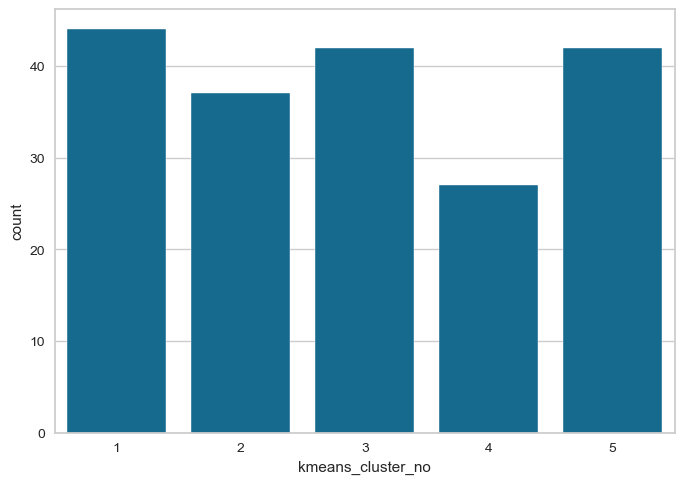

In [41]:
df["kmeans_cluster_no"].value_counts()
sns.countplot(x="kmeans_cluster_no", data=df)
plt.show()

In [42]:
# K√ºme bazƒ±nda √ºlkeler
cluster_countries = df.groupby("kmeans_cluster_no")["Location"].apply(list)
cluster_countries

kmeans_cluster_no
1    [Botswana, CentralAfricanRepublic, Lesotho, Es...
2    [Mauritius, SierraLeone, Seychelles, Afghanist...
3    [Angola, Burundi, Benin, BurkinaFaso, Coted'Iv...
4    [Namibia, Colombia, TrinidadandTobago, Andorra...
5    [Algeria, Bolivia(PlurinationalStateof), Brazi...
Name: Location, dtype: object

In [43]:
# K√ºme bazƒ±nda ortalama deƒüerler
cluster_means = df.groupby("kmeans_cluster_no")[numeric_cols].mean()
cluster_means

Period  TotalExpenditure  PerCapitaExpenditure  \
kmeans_cluster_no                                                   
1                  2019.0       5202.229545             57.565909   
2                  2019.0        288.929730             11.605405   
3                  2019.0         10.807143              0.602381   
4                  2019.0       4781.881481            225.388889   
5                  2019.0        427.126190             35.033333   

                   EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
kmeans_cluster_no                                                         
1                        7.172727        21.456818            30.275000   
2                        5.800000         7.845946            32.770270   
3                        2.716667        24.288095            30.016667   
4                       11.825926        20.025926            31.970370   
5                       12.004762        17.742857            36.302381   

                   UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  \
kmeans_cluster_no                                                           
1                                         43.345455           3544.390909   
2                                         45.191892            294.397297   
3                                         39.847619            264.242857   
4                                         30.170370           3921.229630   
5                                         46.319048            925.464286   

                   both_cancer  female_cancer  male_cancer  kmeans_cluster_no  
kmeans_cluster_no                                                              
1                  2091.105263     782.894737  1308.210526                1.0  
2                   739.137931     255.758621   483.379310                2.0  
3                  4280.609756    1100.658537  3179.951220                3.0  
4                  1947.916667     738.750000  1209.166667                4.0  
5                  1106.809524     298.714286   808.095238                5.0

In [44]:
# Her k√ºmedeki √ºlkeleri listele
clusters_countries = df.groupby("kmeans_cluster_no")["Location"].apply(list)

# Her k√ºmeyi tek tek yazdƒ±ralƒ±m
for cluster, countries in clusters_countries.items():
    print(f"\nüìå K√ºme {cluster} ({len(countries)} √ºlke):")
    print(", ".join(countries))


üìå K√ºme 1 (44 √ºlke):
Botswana, CentralAfricanRepublic, Lesotho, Eswatini, SouthAfrica, Zimbabwe, Argentina, AntiguaandBarbuda, Bahamas, Belize, Barbados, Canada, CostaRica, Dominica, DominicanRepublic, Grenada, Guatemala, Guyana, Honduras, Haiti, Jamaica, SaintKittsandNevis, SaintLucia, Mexico, Nicaragua, Panama, Paraguay, ElSalvador, Suriname, UnitedStatesofAmerica, SaintVincentandtheGrenadines, Venezuela(BolivarianRepublicof), UnitedArabEmirates, Bahrain, Egypt, Iran(IslamicRepublicof), Kuwait, Libya, Qatar, Indonesia, Thailand, China, RepublicofKorea, Singapore

üìå K√ºme 2 (37 √ºlke):
Mauritius, SierraLeone, Seychelles, Afghanistan, Iraq, Jordan, Oman, SaudiArabia, Sudan, Yemen, Spain, Tajikistan, Uzbekistan, SriLanka, Maldives, Myanmar, Nepal, DemocraticPeople'sRepublicofKorea, Timor-Leste, BruneiDarussalam, Fiji, Micronesia(FederatedStatesof), Cambodia, Kiribati, LaoPeople'sDemocraticRepublic, MarshallIslands, Malaysia, Nauru, Philippines, Palau, PapuaNewGuinea, SolomonIsla

üìå K√ºme 1 (44 √ºlke)

√úlkeler: Afrika‚Äônƒ±n g√ºneyi (Botswana, G√ºney Afrika, Zimbabve), Kuzey Afrika‚Äôdan bazƒ± √ºlkeler (Mƒ±sƒ±r, Libya), Kuzey Amerika (ABD, Kanada, Meksika), Orta Amerika ve Karayipler (Dominik, Jamaika, K√ºba hari√ß bir√ßok ada √ºlkesi), G√ºney Amerika‚Äôdan Arjantin, Venezuela, Paraguay, Asya‚Äôdan √áin, Kore, Endonezya, Tayland, Singapur, K√∂rfez √ºlkeleri (BAE, Katar, Kuveyt, Bahreyn).

Genel √ñzellik:

Y√ºksek saƒülƒ±k harcamalarƒ±, g√∂rece daha iyi aƒüƒ±z saƒülƒ±ƒüƒ±, g√º√ßl√º ekonomi ve saƒülƒ±k altyapƒ±sƒ±.

ABD, Kanada, Singapur, √áin gibi y√ºksek gelirli √ºlkeler ile bazƒ± petrol zengini Orta Doƒüu √ºlkeleri aynƒ± k√ºmeye d√º≈üm√º≈ü.

K√ºme 1 (ABD, √áin, K√∂rfez, vs.)

√áok y√ºksek saƒülƒ±k harcamasƒ± (5202), ama ki≈üi ba≈üƒ± d√º≈ü√ºk (57.6) ‚Üí b√ºy√ºk n√ºfuslu √ºlkeler (√áin, ABD).

Aƒüƒ±z saƒülƒ±ƒüƒ± orta d√ºzeyde (Edentulism %7.1).

Kanser y√ºk√º y√ºksek (2091).

üìå K√ºme 2 (37 √ºlke)

√úlkeler: G√ºney Asya (Afganistan, Nepal, Sri Lanka), Orta Asya (Tacikistan, √ñzbekistan), Ortadoƒüu (Irak, Yemen, Suudi Arabistan), G√ºneydoƒüu Asya ve Pasifik √ºlkeleri (Malezya, Filipinler, Fiji, Vietnam).

Genel √ñzellik:

Orta gelir grubu, saƒülƒ±k g√∂stergeleri ve harcama seviyeleri orta seviyede.

Saƒülƒ±k sistemleri geli≈ümekte, ancak b√∂lgesel e≈üitsizlikler mevcut.

K√ºme 2 (Ortadoƒüu + Pasifik + Asya geli≈ümekte)

D√º≈ü√ºk harcama (289 toplam, ki≈üi ba≈üƒ± 11.6).

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂rece iyi (Edentulism %5.8, Periodontal %7.8).

Kanser y√ºk√º d√º≈ü√ºk (739).

üìå K√ºme 3 (42 √ºlke)

√úlkeler: B√ºy√ºk oranda Afrika √ºlkeleri (Kenya, Nijerya, Tanzanya, Etiyopya, Senegal, vs.), ayrƒ±ca Pakistan, Hindistan, Banglade≈ü, Bhutan.

Genel √ñzellik:

D√º≈ü√ºk saƒülƒ±k harcamasƒ±, aƒüƒ±z saƒülƒ±ƒüƒ± sorunlarƒ± daha y√ºksek.

Geli≈ümekte olan ve d√º≈ü√ºk gelirli √ºlkeler.

En kƒ±rƒ±lgan grup diyebiliriz.

K√ºme 3 (Afrika + Hindistan, Pakistan)

√áok d√º≈ü√ºk harcama (10.8 toplam, ki≈üi ba≈üƒ± 0.6).

Edentulism d√º≈ü√ºk (%2.7) ama bu saƒülƒ±k hizmeti yetersizliƒüinden olabilir (raporlanmamƒ±≈ü vaka olasƒ±lƒ±ƒüƒ±).

Periodontal √ßok y√ºksek (%24) ‚Üí ciddi sorun.

Kanser y√ºk√º √ßok y√ºksek (4280, erkeklerde 3180!) ‚Üí saƒülƒ±k hizmetlerine eri≈üim d√º≈ü√ºk.

üìå K√ºme 4 (27 √ºlke)

√úlkeler: Avrupa Birliƒüi ve Batƒ± Avrupa √ºlkeleri (Almanya, Fransa, ƒ∞talya, ƒ∞skandinav √ºlkeleri, Benel√ºks), ayrƒ±ca Avustralya, Japonya, Yeni Zelanda.

Genel √ñzellik:

En geli≈ümi≈ü saƒülƒ±k sistemleri, y√ºksek ki≈üi ba≈üƒ± saƒülƒ±k harcamasƒ±.

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri en iyi seviyede.

Bu k√ºme aslƒ±nda y√ºksek gelirli OECD √ºlkeleri k√ºmesi.

K√ºme 4 (Batƒ± Avrupa + OECD)

√áok y√ºksek harcama (4781, ki≈üi ba≈üƒ± 225).

Edentulism en y√ºksek (%11.8) ‚Üí ya≈ülƒ± n√ºfus etkisi.

Kanser y√ºk√º orta (1947).

Saƒülƒ±k sistemi g√º√ßl√º ama ya≈ülanma kaynaklƒ± aƒüƒ±z saƒülƒ±ƒüƒ± sorunlarƒ± artƒ±yor.

üìå K√ºme 5 (42 √ºlke)

√úlkeler: Doƒüu Avrupa (Rusya, Ukrayna, Polonya, Romanya, Balkan √ºlkeleri), Kuzey Afrika (Cezayir, Tunus, Fas), Latin Amerika (Brezilya, ≈ûili, Peru, Uruguay), T√ºrkiye, ƒ∞srail, ƒ∞sve√ß, Kazakistan.

Genel √ñzellik:

Orta-y√ºksek harcama d√ºzeyi, aƒüƒ±z saƒülƒ±ƒüƒ± bazƒ± alanlarda iyi ama batƒ± √ºlkeleri kadar deƒüil.

Ge√ßi≈ü ekonomileri ve ‚Äúorta-√ºst gelir‚Äù √ºlkeleri diyebiliriz.

K√ºme 5 (Doƒüu Avrupa + Latin Amerika + T√ºrkiye)

Orta harcama (427 toplam, ki≈üi ba≈üƒ± 35).

Edentulism y√ºksek (%12) ‚Üí aƒüƒ±z saƒülƒ±ƒüƒ± zayƒ±f.

Periodontal ve caries oranlarƒ± y√ºksek.

Kanser y√ºk√º orta (1106).

K√ºme 3: En d√º≈ü√ºk geli≈ümi≈ülik (Afrika + G√ºney Asya)

K√ºme 2: Orta geli≈ümi≈ülik (Ortadoƒüu + G√ºneydoƒüu Asya + Pasifik)

K√ºme 5: Orta-√ºst geli≈ümi≈ülik (Doƒüu Avrupa + Latin Amerika + T√ºrkiye)

K√ºme 1: Y√ºksek geli≈ümi≈ülik (ABD, Kanada, √áin, petrol zengini Orta Doƒüu, bazƒ± Latin Amerika √ºlkeleri)

K√ºme 4: En y√ºksek geli≈ümi≈ülik (Batƒ± Avrupa + OECD √ºlkeleri)

En fakir k√ºme: K√ºme 3 (Afrika + G√ºney Asya)

En zengin k√ºme: K√ºme 4 (OECD √ºlkeleri)

Ge√ßi≈ü √ºlkeleri: K√ºme 5 (Doƒüu Avrupa, T√ºrkiye, Latin Amerika)

√ñzel karƒ±≈üƒ±k grup: K√ºme 1 (ABD, √áin, petrol zengini √ºlkeler)

Orta geli≈ümi≈ülik: K√ºme 2 (Ortadoƒüu + Pasifik √ºlkeleri)


Kar≈üƒ±la≈ütƒ±rma:
                                   Germany  Cluster_Avg
Period                             2019.0  2019.000000
TotalExpenditure                  30877.3  4781.881481
PerCapitaExpenditure                372.2   225.388889
EdentulismRate                       11.7    11.825926
PeriodontalRate                      27.4    20.025926
UntreatedCariesRate                  31.7    31.970370
UntreatedDeciduousCaries11_9Rate     29.1    30.170370
ProductivityLossRate              19395.9  3921.229630
both_cancer                        7333.0  1947.916667
female_cancer                      2855.0   738.750000
male_cancer                        4478.0  1209.166667


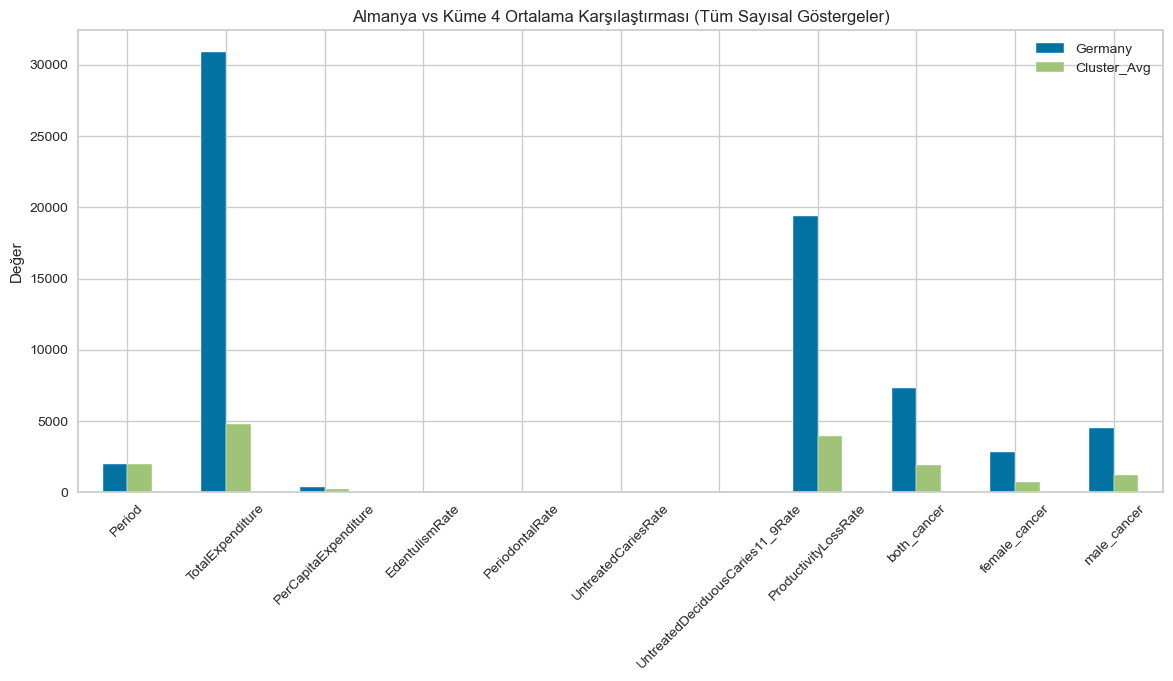

In [45]:
# T√ºm sayƒ±sal s√ºtunlar
numerical_cols = df.select_dtypes(include="number").columns.tolist()
numerical_cols.remove("kmeans_cluster_no")  # K√ºme etiketi kar≈üƒ±la≈ütƒ±rmaya dahil olmasƒ±n

# Almanya'nƒ±n deƒüerleri
germany_values = df[df["Location"] == "Germany"][numerical_cols]

# Almanya'nƒ±n k√ºme numarasƒ±
germany_cluster = df[df["Location"] == "Germany"]["kmeans_cluster_no"].values[0]

# K√ºme ortalamalarƒ±
cluster_mean = df[df["kmeans_cluster_no"] == germany_cluster][numerical_cols].mean()

# Kar≈üƒ±la≈ütƒ±rma tablosu
comparison = pd.DataFrame({
    "Germany": germany_values.values.flatten(),
    "Cluster_Avg": cluster_mean.values
}, index=numerical_cols)

print("\nKar≈üƒ±la≈ütƒ±rma:\n", comparison)

# G√∂rselle≈ütirme - Barplot
comparison.plot(kind="bar", figsize=(14,6))
plt.title(f"Almanya vs K√ºme {germany_cluster} Ortalama Kar≈üƒ±la≈ütƒ±rmasƒ± (T√ºm Sayƒ±sal G√∂stergeler)")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.show()

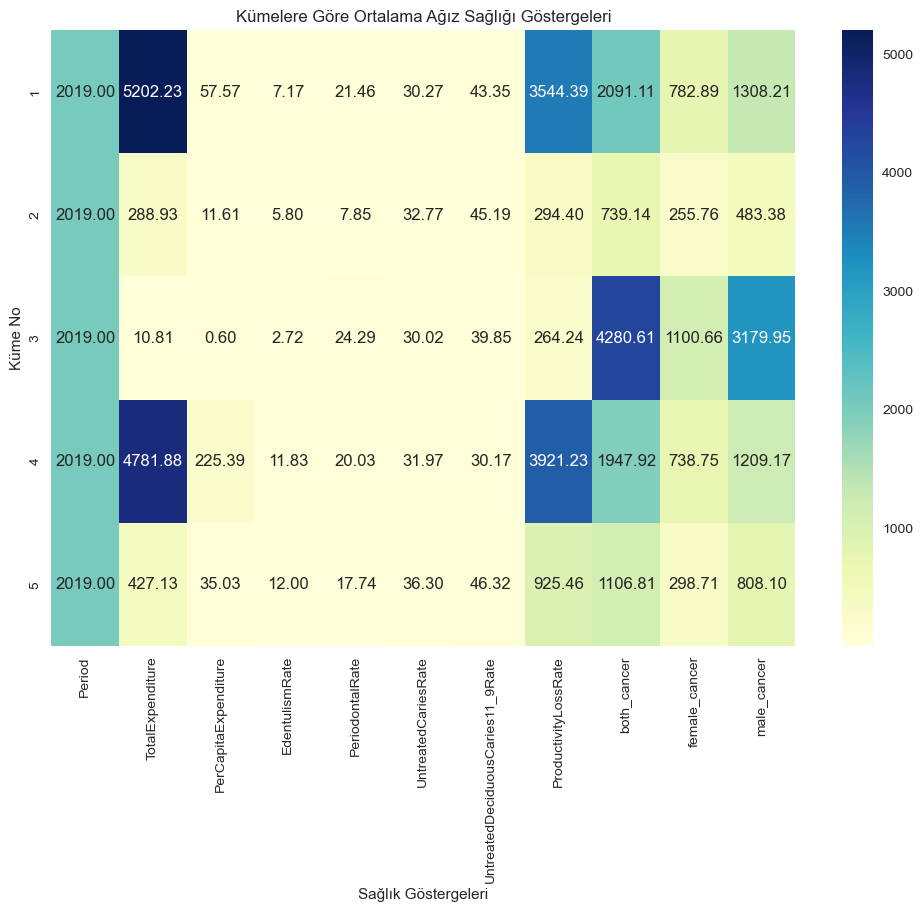

In [46]:
# Sadece sayƒ±sal s√ºtunlar
num_cols = df.select_dtypes(include='number').columns.drop('kmeans_cluster_no')

# K√ºme bazƒ±nda ortalamalar
cluster_means_health = df.groupby("kmeans_cluster_no")[num_cols].mean()

# Heatmap g√∂rselle≈ütirme
plt.figure(figsize=(12,8))
sns.heatmap(cluster_means_health, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("K√ºmelere G√∂re Ortalama Aƒüƒ±z Saƒülƒ±ƒüƒ± G√∂stergeleri")
plt.xlabel("Saƒülƒ±k G√∂stergeleri")
plt.ylabel("K√ºme No")
plt.show()

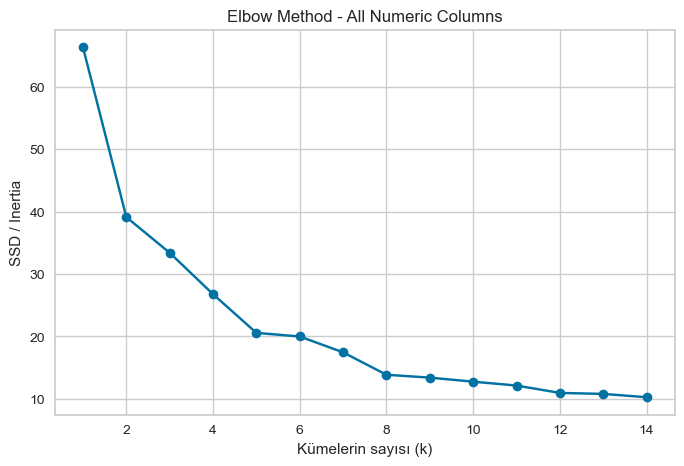

In [47]:
#Agiz kanseri dahil Kmeans k√ºmeleme (eksik deger satirlari silindi)

# T√ºm sayƒ±sal s√ºtunlarƒ± se√ß
numeric_cols = df.select_dtypes(include=np.number).columns

# NaN deƒüerleri temizle
df_numeric = df[numeric_cols].dropna()

# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# Elbow Method i√ßin SSD hesaplama
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xall_scaled)
    ssd.append(kmeans.inertia_)

# G√∂rselle≈ütirme
plt.figure(figsize=(8,5))
plt.plot(K, ssd, 'bo-')
plt.xlabel('K√ºmelerin sayƒ±sƒ± (k)')
plt.ylabel('SSD / Inertia')
plt.title('Elbow Method - All Numeric Columns')
plt.show()

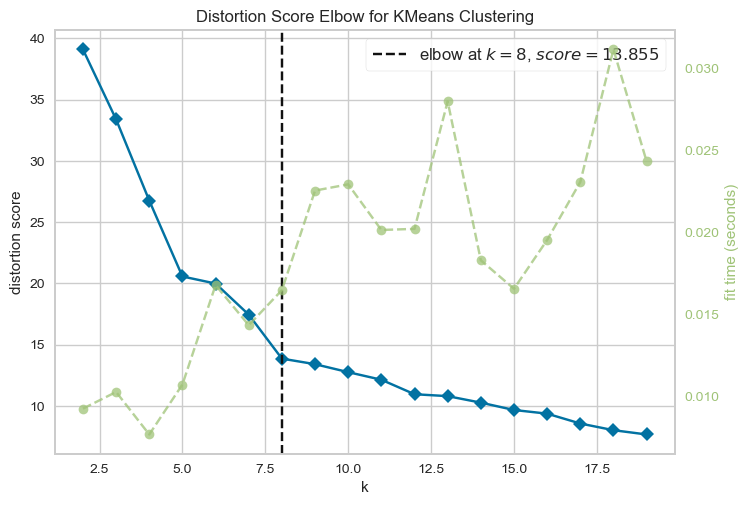

Optimal k√ºme sayƒ±sƒ±: 8


In [48]:
# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# KMeans modeli
kmeans = KMeans(random_state=42)

# K-Elbow (2-20 arasƒ±nda K denemesi)
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(Xall_scaled)
elbow.show()

# Optimal K
print("Optimal k√ºme sayƒ±sƒ±:", elbow.elbow_value_)

In [49]:
# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# KMeans fit
kmeans = KMeans(n_clusters=elbow.elbow_value_, random_state=42)
kmeans.fit(Xall_scaled)

# K√ºme sayƒ±sƒ±
print("K√ºme sayƒ±sƒ±:", kmeans.n_clusters)

# K√ºme merkezleri (√∂l√ßeklenmi≈ü deƒüerler)
print("K√ºme merkezleri:\n", kmeans.cluster_centers_)

# Her verinin etiketi (hangi segmentte olduƒüu)
df_numeric["kmeans_cluster_no"] = kmeans.labels_ + 1

# ƒ∞lk 5 satƒ±r
df_numeric.head()

K√ºme sayƒ±sƒ±: 8
K√ºme merkezleri:
 [[0.00000000e+00 1.93069454e-02 1.00896002e-01 3.76992377e-01
  6.03170478e-01 3.09341951e-01 7.06071289e-01 2.66587528e-02
  1.09196133e-02 1.87567637e-02 8.58765320e-03 1.11022302e-16]
 [0.00000000e+00 1.62761583e-02 1.78466319e-01 6.67652860e-01
  5.13313609e-01 3.96599777e-01 3.30434783e-01 3.12985874e-02
  9.56225938e-03 1.56857342e-02 7.74228638e-03 7.69230769e-01]
 [0.00000000e+00 7.28994546e-05 1.19926199e-03 9.48717949e-02
  7.02884615e-01 2.95108696e-01 6.11086957e-01 1.20445845e-03
  7.26419328e-03 1.10808174e-02 6.13343207e-03 5.00000000e-01]
 [0.00000000e+00 2.75992142e-03 2.26692830e-02 2.88019452e-01
  2.10764810e-01 3.76436782e-01 7.57921039e-01 4.76173275e-03
  5.42304274e-03 8.17956443e-03 4.60901309e-03 2.50000000e-01]
 [0.00000000e+00 2.38497129e-03 4.57661682e-02 6.95512821e-01
  4.94551282e-01 5.23097826e-01 8.11666667e-01 1.12264359e-02
  8.37122132e-03 9.67522707e-03 7.99111408e-03 1.00000000e+00]
 [0.00000000e+00 6.10802619e

Period  TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
0    2019              70.2                   2.3             4.0   
1    2019               1.3                   0.1             2.0   
2    2019               3.3                   0.3             2.9   
3    2019               4.6                   0.2             1.9   
4    2019              57.4                  24.1             7.5   

   PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
0             23.9                 27.2                              37.8   
1             19.2                 31.7                              41.6   
2             27.1                 29.5                              39.6   
3             27.4                 27.5                              40.3   
4             26.3                 32.7                              37.6   

   ProductivityLossRate  both_cancer  female_cancer  male_cancer  \
0                 195.8        482.0          166.0        316.0   
1                   5.3         92.0           30.0         62.0   
2                  30.0         74.0           42.0         32.0   
3                  30.8        179.0           55.0        124.0   
4                  59.2         60.0            8.0         52.0   

   kmeans_cluster_no  
0                  3  
1                  3  
2                  3  
3                  3  
4                  1

In [50]:
# K√ºme bazlƒ± √∂zet (sayƒ±sal s√ºtunlar)
numeric_cols = df_numeric.select_dtypes(include=np.number).columns

cluster_summary = df_numeric.groupby("kmeans_cluster_no")[numeric_cols].agg(["count", "mean", "median"])

# G√∂ster
cluster_summary

Period                 TotalExpenditure                 \
                   count    mean  median            count           mean   
kmeans_cluster_no                                                          
1                     37  2019.0  2019.0               37    2577.589189   
2                     13  2019.0  2019.0               13    2172.961538   
3                     40  2019.0  2019.0               40       9.732500   
4                     29  2019.0  2019.0               29     368.465517   
5                     40  2019.0  2019.0               40     318.407500   
6                     13  2019.0  2019.0               13    8154.569231   
7                      1  2019.0  2019.0                1  133505.800000   
8                      1  2019.0  2019.0                1      64.500000   

                             PerCapitaExpenditure                     \
                      median                count        mean median   
kmeans_cluster_no                                                      
1                      82.30                   37   51.951351   16.7   
2                     593.70                   13   91.892308   91.6   
3                       2.90                   40    0.617500    0.2   
4                      16.70                   29   11.672414    3.1   
5                     117.25                   40   23.565000   15.5   
6                    3375.80                   13  318.492308  321.7   
7                  133505.80                    1  405.500000  405.5   
8                      64.50                    1    0.000000    0.0   

                  EdentulismRate  ... both_cancer female_cancer                \
                           count  ...      median         count          mean   
kmeans_cluster_no                 ...                                           
1                             37  ...        89.0            37    586.486486   
2                             13  ...       317.0            13    490.461538   
3                             40  ...       144.5            40    346.475000   
4                             29  ...       277.0            29    255.758621   
5                             40  ...       261.5            40    302.525000   
6                             13  ...       695.0            13    907.615385   
7                              1  ...     24470.0             1   8050.000000   
8                              1  ...    135929.0             1  31268.000000   

                           male_cancer                           \
                    median       count           mean    median   
kmeans_cluster_no                                                 
1                     32.0          37     899.783784      53.0   
2                    115.0          13     811.307692     208.0   
3                     54.0          40     642.925000      74.0   
4                    138.0          29     483.379310     126.0   
5                     92.5          40     837.350000     178.0   
6                    331.0          13    1455.307692     471.0   
7                   8050.0           1   16420.000000   16420.0   
8                  31268.0           1  104661.000000  104661.0   

                  kmeans_cluster_no              
                              count mean median  
kmeans_cluster_no                                
1                                37  1.0    1.0  
2                                13  2.0    2.0  
3                                40  3.0    3.0  
4                                29  4.0    4.0  
5                                40  5.0    5.0  
6                                13  6.0    6.0  
7                                 1  7.0    7.0  
8                                 1  8.0    8.0  

[8 rows x 36 columns]

In [51]:
# Eƒüer df_numeric sadece sayƒ±sallarƒ± i√ßeriyorsa
df_numeric["Location"] = df["Location"]
clusters_countries = df_numeric.groupby("kmeans_cluster_no")["Location"].apply(list)

for cluster, countries in clusters_countries.items():
    print(f"\nüìå K√ºme {cluster} ({len(countries)} √ºlke):")
    print(", ".join(countries))


üìå K√ºme 1 (37 √ºlke):
Botswana, CentralAfricanRepublic, Lesotho, Eswatini, SouthAfrica, Zimbabwe, Argentina, Bahamas, Barbados, Canada, CostaRica, DominicanRepublic, Guatemala, Guyana, Honduras, Haiti, Jamaica, SaintLucia, Mexico, Nicaragua, Panama, Paraguay, ElSalvador, Suriname, Venezuela(BolivarianRepublicof), UnitedArabEmirates, Bahrain, Egypt, Iran(IslamicRepublicof), Kuwait, Libya, Qatar, Indonesia, Thailand, China, RepublicofKorea, Singapore

üìå K√ºme 2 (13 √ºlke):
Namibia, Colombia, TrinidadandTobago, Cyprus, Finland, France, UnitedKingdomofGreatBritainandNorthernIreland, Greece, Ireland, Israel, Malta, Portugal, NewZealand

üìå K√ºme 3 (40 √ºlke):
Angola, Burundi, Benin, BurkinaFaso, Coted'Ivoire, Cameroon, DemocraticRepublicoftheCongo, Congo, Comoros, CaboVerde, Eritrea, Ethiopia, Gabon, Ghana, Guinea, Gambia, Guinea-Bissau, EquatorialGuinea, Kenya, Liberia, Madagascar, Mali, Mozambique, Mauritania, Malawi, Niger, Nigeria, Rwanda, Senegal, SouthSudan, Chad, Togo, Unite

üìåK√ºme 1 (37 √ºlke)

√áoƒüunluk Afrika ve bazƒ± Orta-Amerika √ºlkeleri.

Orta-d√º≈ü√ºk toplam harcama ve ki≈üi ba≈üƒ± harcama olasƒ±lƒ±ƒüƒ± y√ºksek.

Toplam harcama: 2577 ortalama

Ki≈üi ba≈üƒ± harcama: 51.95

√úretkenlik kaybƒ± ve aƒüƒ±z saƒülƒ±ƒüƒ± oranlarƒ±: orta seviyede

Kanser vakalarƒ±: d√º≈ü√ºk-orta

Bu k√ºme √ßoƒüunlukla orta gelirli √ºlkeler olabilir.

üìåK√ºme 2 (13 √ºlke)

Avrupa‚Äônƒ±n bazƒ± refah d√ºzeyi y√ºksek √ºlkeleri (ƒ∞svi√ßre, Finland, ƒ∞ngiltere vb.)

Y√ºksek aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri ve harcama ortalamasƒ± daha iyi olabilir.

Toplam harcama: 2172 ortalama

Ki≈üi ba≈üƒ± harcama: 91.9 (K√ºme 1‚Äôden y√ºksek)

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri y√ºksek

Kanser vakalarƒ± orta seviyede

Avrupa‚Äônƒ±n refah seviyesi orta-√ºst √ºlkeleri gibi g√∂r√ºn√ºyor.

üìåK√ºme 3 (40 √ºlke)

Afrika‚Äônƒ±n d√º≈ü√ºk gelirli √ºlkeleri aƒüƒ±rlƒ±klƒ±.

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergelerinde sorunlu, harcamada d√º≈ü√ºk.

Toplam harcama √ßok d√º≈ü√ºk: 9.7

Ki≈üi ba≈üƒ± harcama 0.6 ‚Üí ciddi d√º≈ü√ºk gelir

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri k√∂t√º deƒüil ama d√º≈ü√ºk harcama dikkat √ßekici

Kanser vakalarƒ± d√º≈ü√ºk ‚Üí demografik ve raporlama etkisi olabilir.

üìåK√ºme 4 (29 √ºlke)

Orta Doƒüu ve G√ºneydoƒüu Asya √ºlkeleri, geli≈ümekte olan √ºlkeler karƒ±≈üƒ±k.

Harcama ve saƒülƒ±k g√∂stergeleri karƒ±≈üƒ±k.

üìåK√ºme 5 (40 √ºlke)

G√ºney Amerika ve Doƒüu Avrupa aƒüƒ±rlƒ±klƒ±.

Harcama ve saƒülƒ±k g√∂stergelerinde orta seviyeler.

(k√ºme 4 ve k√ºme 5 Orta harcama ve ki≈üi ba≈üƒ± harcama Aƒüƒ±z saƒülƒ±ƒüƒ± ve kanser vakalarƒ± deƒüi≈üken

Muhtemelen geli≈ümekte olan √ºlkeler veya karƒ±≈üƒ±k gelir grubu)

üìåK√ºme 6 (13 √ºlke)

Almanya, ƒ∞sve√ß, Avusturya gibi zengin √ºlkeler + geli≈ümi≈ü √ºlkeler.

Y√ºksek toplam ve ki≈üi ba≈üƒ± harcama, iyi aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri.

Toplam ve ki≈üi ba≈üƒ± harcama y√ºksek (8154 ve 318 ki≈üi ba≈üƒ±)

Kanser vakalarƒ± orta-y√ºksek

Refah seviyesi y√ºksek √ºlkeler

üìåK√ºme 7 (1 √ºlke)

ABD tek ba≈üƒ±na bir k√ºme olu≈üturmu≈ü.

Toplam ve ki≈üi ba≈üƒ± harcama √ßok y√ºksek

Kanser vakalarƒ± da √ßok y√ºksek

B√ºy√ºk toplam harcama ama ki≈üi ba≈üƒ±na deƒüi≈ükenlik g√∂sterebilir.

Tek ba≈üƒ±na k√ºme olu≈ümasƒ± n√ºfus ve harcama etkisinden kaynaklanƒ±yor.

üìåK√ºme 8 (1 √ºlke)

Hindistan tek ba≈üƒ±na.

√áok b√ºy√ºk n√ºfus ve d√º≈ü√ºk ki≈üi ba≈üƒ± harcama nedeniyle ayrƒ± k√ºme.

Toplam harcama d√º≈ü√ºk, ki≈üi ba≈üƒ± harcama √ßok d√º≈ü√ºk

Kanser vakalarƒ± n√ºfus etkisiyle √ßok y√ºksek

Bu da n√ºfus b√ºy√ºkl√ºƒü√º ve d√º≈ü√ºk ki≈üi ba≈üƒ± harcama etkisi.



üîπ Analiz Yorumlarƒ±

K√ºmeleme, gelir ve saƒülƒ±k g√∂stergeleri ile coƒürafi daƒüƒ±lƒ±mƒ± birle≈ütiriyor gibi.

K√ºme 6 Almanya dahil, y√ºksek harcama ve iyi saƒülƒ±k g√∂stergeleri ile zengin √ºlkeleri temsil ediyor.

K√ºme 1 ve 3, d√º≈ü√ºk gelir ve d√º≈ü√ºk saƒülƒ±k g√∂stergeleri olan √ºlkeleri temsil ediyor.

ABD ve Hindistan gibi n√ºfus etkisi √ßok y√ºksek √ºlkeler, tek ba≈ülarƒ±na ayrƒ± k√ºme olu≈üturmu≈ü.

üîπ Genel Yorumlar

Harcamalar ve saƒülƒ±k g√∂stergeleri k√ºmeleme i√ßin g√º√ßl√º etken.

N√ºfus etkisi (ABD, Hindistan) tekil k√ºmeler olu≈üturuyor.

Avrupa ve y√ºksek gelirli √ºlkeler kendi k√º√ß√ºk k√ºmelerinde toplanmƒ±≈ü (k√ºme 6).

D√º≈ü√ºk gelirli Afrika ve bazƒ± Asya √ºlkeleri k√ºme 3‚Äôte toplanmƒ±≈ü.


Kar≈üƒ±la≈ütƒ±rma:
                                   Germany  Cluster_Avg
Period                             2019.0  2019.000000
TotalExpenditure                  30877.3  8154.569231
PerCapitaExpenditure                372.2   318.492308
EdentulismRate                       11.7    12.138462
PeriodontalRate                      27.4    21.246154
UntreatedCariesRate                  31.7    31.707692
UntreatedDeciduousCaries11_9Rate     29.1    31.869231
ProductivityLossRate              19395.9  5956.630769
both_cancer                        7333.0  2362.923077
female_cancer                      2855.0   907.615385
male_cancer                        4478.0  1455.307692


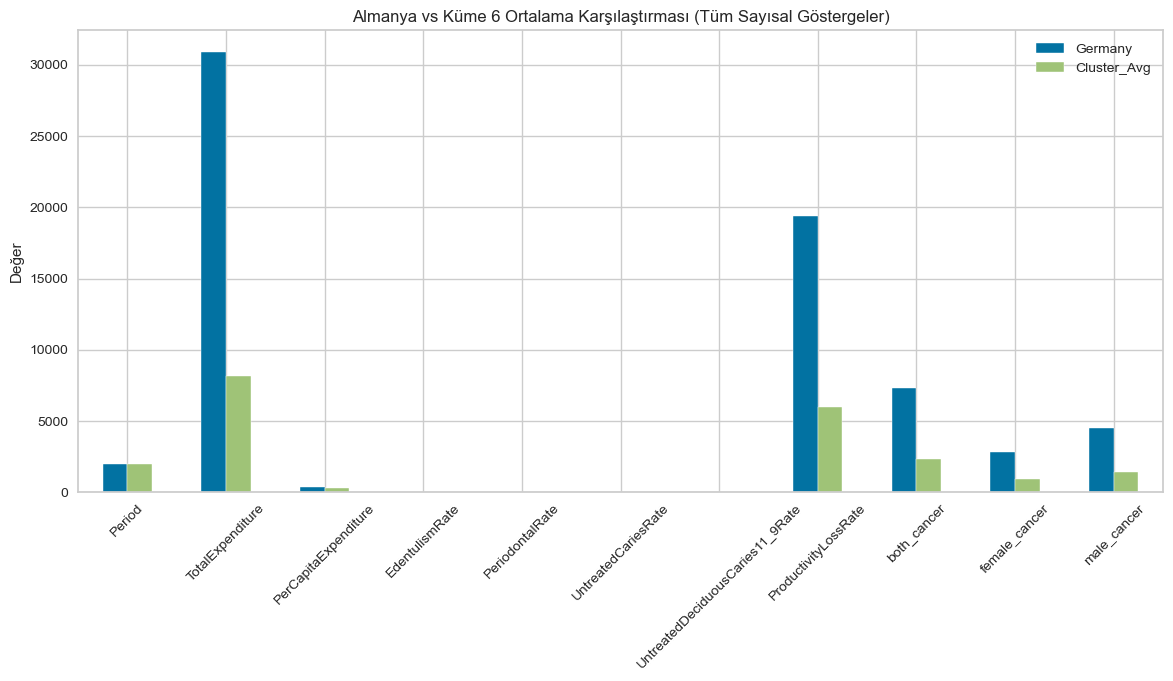

In [52]:
# T√ºm sayƒ±sal s√ºtunlar
numerical_cols = df_numeric.select_dtypes(include="number").columns.tolist()
numerical_cols.remove("kmeans_cluster_no")  # K√ºme etiketi kar≈üƒ±la≈ütƒ±rmaya dahil olmasƒ±n

# Almanya'nƒ±n deƒüerleri
germany_values = df_numeric[df_numeric["Location"] == "Germany"][numerical_cols]

# Almanya'nƒ±n k√ºme numarasƒ±
germany_cluster = df_numeric[df_numeric["Location"] == "Germany"]["kmeans_cluster_no"].values[0]

# K√ºme ortalamalarƒ±
cluster_mean = df_numeric[df_numeric["kmeans_cluster_no"] == germany_cluster][numerical_cols].mean()

# Kar≈üƒ±la≈ütƒ±rma tablosu
comparison = pd.DataFrame({
    "Germany": germany_values.values.flatten(),
    "Cluster_Avg": cluster_mean.values
}, index=numerical_cols)

print("\nKar≈üƒ±la≈ütƒ±rma:\n", comparison)

# G√∂rselle≈ütirme - Barplot
comparison.plot(kind="bar", figsize=(14,6))
plt.title(f"Almanya vs K√ºme {germany_cluster} Ortalama Kar≈üƒ±la≈ütƒ±rmasƒ± (T√ºm Sayƒ±sal G√∂stergeler)")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.show()

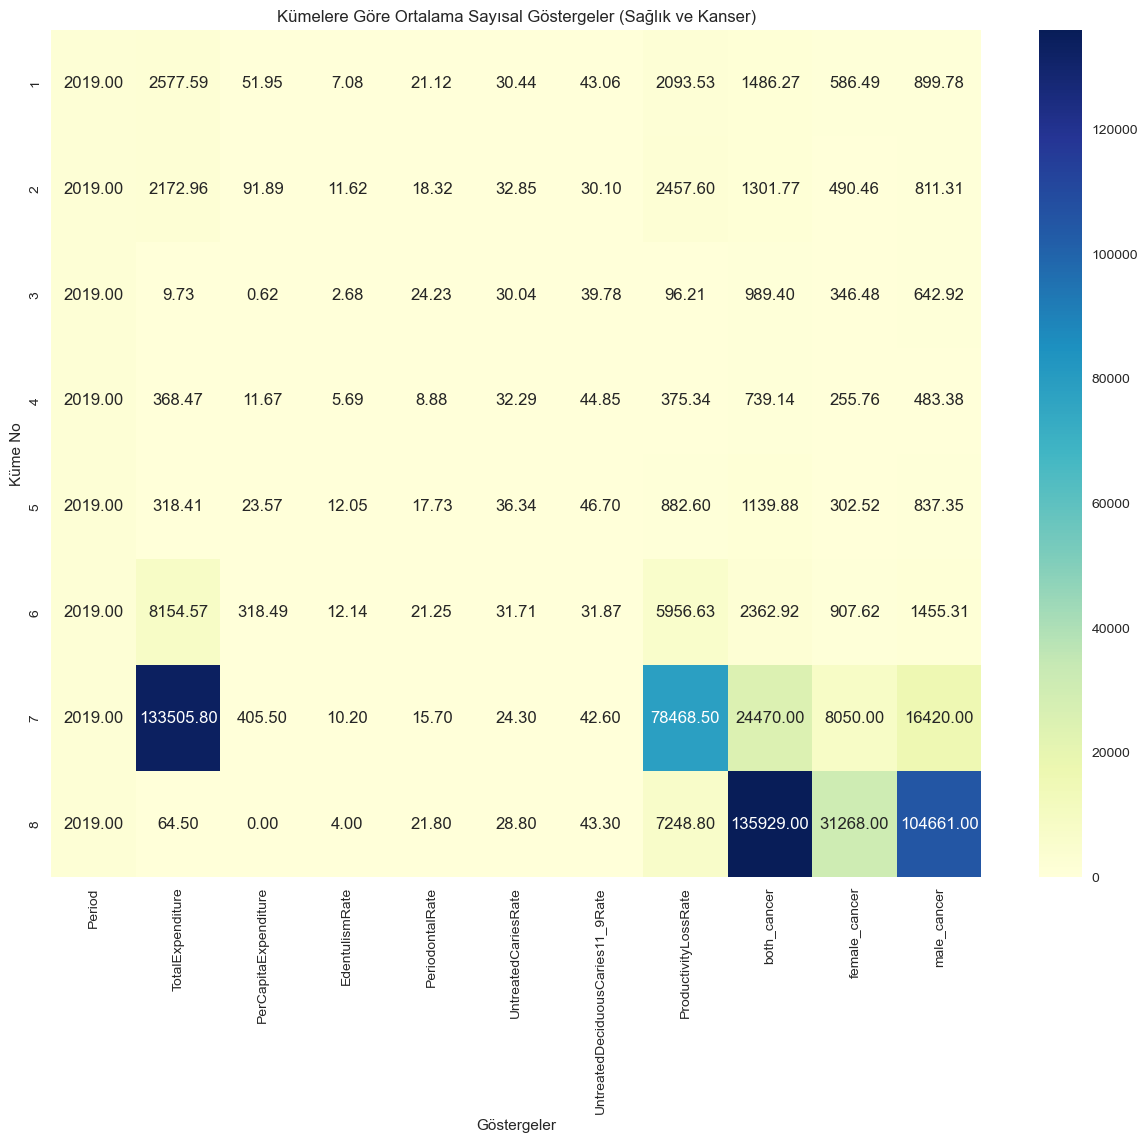

In [53]:
# Sadece sayƒ±sal s√ºtunlar
numeric_cols = df_numeric.select_dtypes(include='number').columns.drop('kmeans_cluster_no')

# K√ºme bazƒ±nda ortalamalar
cluster_means = df_numeric.groupby("kmeans_cluster_no")[numeric_cols].mean()

# Heatmap g√∂rselle≈ütirme
plt.figure(figsize=(15,11))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("K√ºmelere G√∂re Ortalama Sayƒ±sal G√∂stergeler (Saƒülƒ±k ve Kanser)")
plt.xlabel("G√∂stergeler")
plt.ylabel("K√ºme No")
plt.show()

##### Regression Model

In [54]:
df.dtypes

Location                              object
Period                                 int64
TotalExpenditure                     float64
PerCapitaExpenditure                 float64
EdentulismRate                       float64
PeriodontalRate                      float64
UntreatedCariesRate                  float64
UntreatedDeciduousCaries11_9Rate     float64
ProductivityLossRate                 float64
both_cancer                          float64
female_cancer                        float64
male_cancer                          float64
ExpenditureGroup                    category
kmeans_cluster_no                      int32
dtype: object

In [55]:
df.isnull().sum()

Location                             0
Period                               0
TotalExpenditure                     0
PerCapitaExpenditure                 0
EdentulismRate                       0
PeriodontalRate                      0
UntreatedCariesRate                  0
UntreatedDeciduousCaries11_9Rate     0
ProductivityLossRate                 0
both_cancer                         18
female_cancer                       18
male_cancer                         18
ExpenditureGroup                     0
kmeans_cluster_no                    0
dtype: int64

In [56]:
df.columns

Index(['Location', 'Period', 'TotalExpenditure', 'PerCapitaExpenditure',
       'EdentulismRate', 'PeriodontalRate', 'UntreatedCariesRate',
       'UntreatedDeciduousCaries11_9Rate', 'ProductivityLossRate',
       'both_cancer', 'female_cancer', 'male_cancer', 'ExpenditureGroup',
       'kmeans_cluster_no'],
      dtype='object')

In [57]:
#linear regression bos degerler ile calismaz bu nedenle:
df["both_cancer_fill"] = df.groupby(["ExpenditureGroup", "kmeans_cluster_no"])["both_cancer"].transform(
    lambda x: x.fillna(x.mean())
)

In [58]:
X = df[[
    "EdentulismRate",
    "PeriodontalRate",
    "UntreatedCariesRate",
    "UntreatedDeciduousCaries11_9Rate",
    "both_cancer_fill"
]]
y = df["ProductivityLossRate"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Performans
print("Linear Regression R¬≤:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression R¬≤: -0.024697406451088977
Linear Regression RMSE: 3362.4672191174263


-0.0247 ‚Üí Linear Regression modeli, ProductivityLossRate deƒüi≈ükenini a√ßƒ±klamakta ba≈üarƒ±sƒ±z olmu≈ü.

Bu, modelin verideki ili≈ükileri yakalayamadƒ±ƒüƒ±nƒ± g√∂sterir.

RMSE (Root Mean Squared Error), tahminlerin ortalama hata miktarƒ±nƒ± g√∂sterir.

Birim: ProductivityLossRate ile aynƒ± (US$).

Yani modelin tahminleri, ortalama olarak 3362 dolar sapma g√∂steriyor.

Doƒürusal ili≈üki yok: Linear Regression, sadece doƒürusal ili≈ükileri yakalayabilir. Aƒüƒ±z saƒülƒ±ƒüƒ± verileri karma≈üƒ±k olabilir.

√ñzellik se√ßimi yetersiz: Belki bazƒ± √∂nemli deƒüi≈ükenleri dƒ±≈üladƒ±k.

Veri daƒüƒ±lƒ±mƒ± dengesiz: Outlier'lar veya √ßok geni≈ü deƒüer aralƒ±klarƒ± olabilir.

Eksik etkile≈üimler: Deƒüi≈ükenler arasƒ± etkile≈üimleri modellememi≈ü olabiliriz.

In [61]:
X = df[[
    "EdentulismRate",
    "PeriodontalRate",
    "UntreatedCariesRate",
    "UntreatedDeciduousCaries11_9Rate",
    "both_cancer"
]]
y = df["ProductivityLossRate"]

In [62]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Tahmin
y_pred_rf = rf_model.predict(X_test)

In [63]:
# Metrikler
print("üîπ R¬≤ (R-squared):", r2_score(y_test, y_pred_rf))
print("üîπ RMSE (Root Mean Squared Error):", mean_squared_error(y_test, y_pred_rf, squared=False))
print("üîπ MAE (Mean Absolute Error):", mean_absolute_error(y_test, y_pred_rf))
print("üîπ MedAE (Median Absolute Error):", median_absolute_error(y_test, y_pred_rf))
print("üîπ MAPE (Mean Absolute Percentage Error):", mean_absolute_percentage_error(y_test, y_pred_rf))
print("üîπ Explained Variance:", explained_variance_score(y_test, y_pred_rf))
print("üîπ Max Error:", max_error(y_test, y_pred_rf))


üîπ R¬≤ (R-squared): 0.5259179078179896
üîπ RMSE (Root Mean Squared Error): 2287.109806015471
üîπ MAE (Mean Absolute Error): 1009.471102564102
üîπ MedAE (Median Absolute Error): 156.2870000000001
üîπ MAPE (Mean Absolute Percentage Error): 4.412051638156699
üîπ Explained Variance: 0.5396359608122461
üîπ Max Error: 8071.448999999999


In [64]:
# Parametreler
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

# En iyi parametreler
print("üîß En iyi parametreler:", grid_search.best_params_)

üîß En iyi parametreler: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [65]:
# En iyi parametrelerle model
final_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

# T√ºm eƒüitim verisiyle eƒüit
final_model.fit(X_train, y_train)

# Tahmin yap
y_pred_final = final_model.predict(X_test)


In [66]:
print("üîπ Final R¬≤:", r2_score(y_test, y_pred_final))
print("üîπ Final RMSE:", mean_squared_error(y_test, y_pred_final, squared=False))
print("üîπ Final MAE:", mean_absolute_error(y_test, y_pred_final))


üîπ Final R¬≤: 0.5114935077647503
üîπ Final RMSE: 2321.642848205842
üîπ Final MAE: 1033.1126666666667


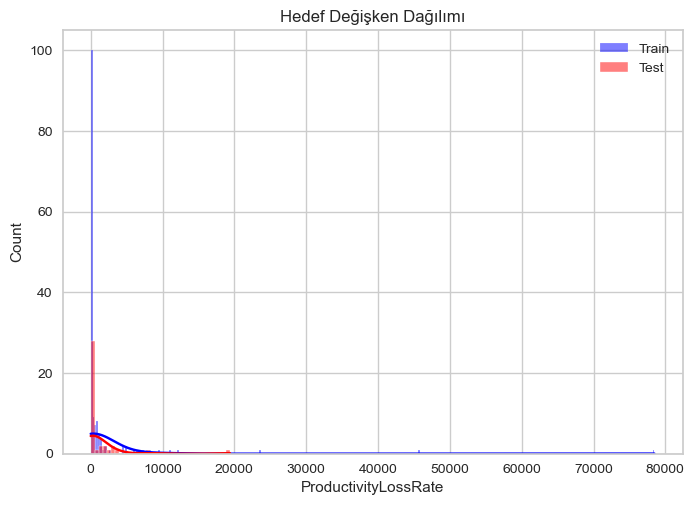

In [67]:
sns.histplot(y_train, color="blue", label="Train", kde=True)
sns.histplot(y_test, color="red", label="Test", kde=True)
plt.legend()
plt.title("Hedef Deƒüi≈üken Daƒüƒ±lƒ±mƒ±")
plt.show()


In [68]:
rf_model = RandomForestRegressor(n_estimators=108, max_depth=7, random_state=42)


In [69]:
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_final = rf_model.predict(X_test)


In [70]:
print("üîπ Final R¬≤:", r2_score(y_test, y_pred_final))
print("üîπ Final RMSE:", mean_squared_error(y_test, y_pred_final, squared=False))
print("üîπ Final MAE:", mean_absolute_error(y_test, y_pred_final))

üîπ Final R¬≤: 0.5576622221889928
üîπ Final RMSE: 2209.2113027310456
üîπ Final MAE: 973.2077680925344


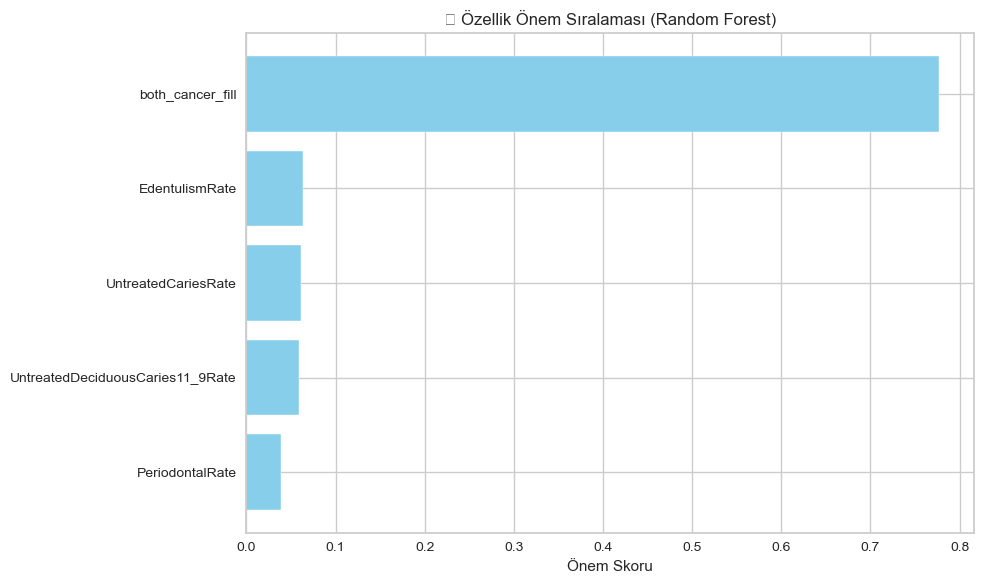

In [71]:
# √ñzellik isimleri ve √∂nem skorlarƒ±
feature_importances = final_model.feature_importances_
features = X_train.columns

# DataFrame olu≈ütur
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("√ñnem Skoru")
plt.title("üìå √ñzellik √ñnem Sƒ±ralamasƒ± (Random Forest)")
plt.tight_layout()
plt.show()


###### Amerika ve Hindistan satirlari location columndan kaldirilarak tekrar modellersek:

In [73]:
# "america" ve "indian" i√ßeren satƒ±rlarƒ± filtreleyip silme
df = df[~df['Location'].isin(['UnitedStatesofAmerica', 'India'])]

In [74]:
X = df[[
    "EdentulismRate",
    "PeriodontalRate",
    "UntreatedCariesRate",
    "UntreatedDeciduousCaries11_9Rate",
    "both_cancer"
]]
y = df["ProductivityLossRate"]

In [75]:
rf_model = RandomForestRegressor(n_estimators=108, max_depth=7, random_state=42)

In [76]:
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_final = rf_model.predict(X_test)

In [77]:
print("üîπ Final R¬≤:", r2_score(y_test, y_pred_final))
print("üîπ Final RMSE:", mean_squared_error(y_test, y_pred_final, squared=False))
print("üîπ Final MAE:", mean_absolute_error(y_test, y_pred_final))

üîπ Final R¬≤: 0.5576622221889928
üîπ Final RMSE: 2209.2113027310456
üîπ Final MAE: 973.2077680925344
